In [2]:
# from google.colab import drive
# drive.mount('/content/drive', force_remount=True)

In [2]:
%pip install SimpleITK

Note: you may need to restart the kernel to use updated packages.


In [1]:
import pandas as pd

candidates0 = pd.read_csv("E:/6th year/maia work/2. Italy - Cassino/Project-Multi-Disciplinary/Code/ML/subset0_candidates.csv", index_col="Unnamed: 0")
candidates1 = pd.read_csv("E:/6th year/maia work/2. Italy - Cassino/Project-Multi-Disciplinary/Code/ML/subset1_candidates.csv", index_col="Unnamed: 0")

custom_features0 =  pd.read_csv("E:/6th year/maia work/2. Italy - Cassino/Project-Multi-Disciplinary/Code/ML/custom_features0.csv", index_col="Unnamed: 0")
custom_features1 =  pd.read_csv("E:/6th year/maia work/2. Italy - Cassino/Project-Multi-Disciplinary/Code/ML/custom_features1.csv", index_col="Unnamed: 0")

hog_features0 =  pd.read_csv("E:/6th year/maia work/2. Italy - Cassino/Project-Multi-Disciplinary/Code/ML/hog_features.csv", index_col="Unnamed: 0")
hog_features1 =  pd.read_csv("E:/6th year/maia work/2. Italy - Cassino/Project-Multi-Disciplinary/Code/ML/hog_features1.csv", index_col="Unnamed: 0")

candidates8 = pd.read_csv("E:/6th year/maia work/2. Italy - Cassino/Project-Multi-Disciplinary/Code/ML/subset8_candidates.csv", index_col="Unnamed: 0")

custom_features8 =  pd.read_csv("E:/6th year/maia work/2. Italy - Cassino/Project-Multi-Disciplinary/Code/ML/custom_features8.csv", index_col="Unnamed: 0")

In [28]:
print(len(candidates0))
print(len(custom_features0))
print(len(candidates0)-len(custom_features0))
print("-----------")
print(len(candidates1))
print(len(custom_features1))
print(len(candidates1)-len(custom_features1))
print("-----------")
print(len(candidates8))
print(len(custom_features8))
print(len(candidates8)-len(custom_features8))


77509
77509
0
-----------
64355
64355
0
-----------
61122
61122
0


In [5]:
print(candidates1)
print(candidates1[candidates1["Class"]==1])

                                               seriesuid    x    y    z  Class
0      1.3.6.1.4.1.14519.5.2.1.6279.6001.104562737760...  190  374   35    0.0
1      1.3.6.1.4.1.14519.5.2.1.6279.6001.104562737760...  167  382   37    0.0
2      1.3.6.1.4.1.14519.5.2.1.6279.6001.104562737760...  177  382   36    0.0
3      1.3.6.1.4.1.14519.5.2.1.6279.6001.104562737760...  184  382   35    0.0
4      1.3.6.1.4.1.14519.5.2.1.6279.6001.104562737760...  189  364   36    0.0
...                                                  ...  ...  ...  ...    ...
64350  1.3.6.1.4.1.14519.5.2.1.6279.6001.970264865033...  302  254  375    0.0
64351  1.3.6.1.4.1.14519.5.2.1.6279.6001.970264865033...  186  273  378    0.0
64352  1.3.6.1.4.1.14519.5.2.1.6279.6001.970264865033...  271  265  381    0.0
64353  1.3.6.1.4.1.14519.5.2.1.6279.6001.970264865033...  269  265  384    0.0
64354  1.3.6.1.4.1.14519.5.2.1.6279.6001.970264865033...  249  259  388    0.0

[64355 rows x 5 columns]
                          

In [2]:
candidates0 = candidates0.sort_index()
candidates1 = candidates1.sort_index()

custom_features0 = custom_features0.sort_index()
custom_features1 = custom_features1.sort_index()

hog_features0 = hog_features0.sort_index()
hog_features1 = hog_features1.sort_index()

candidates8 = candidates8.sort_index()
custom_features8 = custom_features8.sort_index()

In [3]:
import numpy as np

np.all(custom_features0.index == hog_features0.index)

True

In [3]:
hog_features0["Class"] = custom_features0["Class"]
hog_features1["Class"] = custom_features1["Class"]




custom_features0[["x", "y", "z"]] = candidates0[["x", "y", "z"]]
custom_features1[["x", "y", "z"]] = candidates1[["x", "y", "z"]]
custom_features8[["x", "y", "z"]] = candidates8[["x", "y", "z"]]

custom_features0_positives = custom_features0[custom_features0["Class"]==1]
custom_features0_negatives = custom_features0.drop(custom_features0[custom_features0["Class"]==1].index)

custom_features1_positives = custom_features1[custom_features1["Class"]==1]
custom_features1_negatives = custom_features1.drop(custom_features1[custom_features1["Class"]==1].index)

# hog_features0_positives = hog_features0[hog_features0["Class"]==1]
# hog_features0_negatives = hog_features0.drop(hog_features0[hog_features0["Class"]==1].index)

# hog_features1_positives = hog_features1[hog_features1["Class"]==1]
# hog_features1_negatives = hog_features1.drop(hog_features1[hog_features1["Class"]==1].index)

# print(custom_features0_negatives)

print(custom_features1_positives)
# print(custom_features1_negatives)

       z_distance_from_boundary  z_distance_from_boundary_percent  area  \
419                         100                          0.357143     0   
420                         101                          0.360714     0   
2809                        141                          0.429878     0   
2820                        141                          0.429878     0   
3019                        133                          0.405488     0   
...                         ...                               ...   ...   
63481                       149                          0.450151     0   
63482                       150                          0.453172     0   
63500                       152                          0.459215     0   
63504                       155                          0.468278     0   
63910                       202                          0.466513     0   

       perimeter  compactness  eccentricity  major_axis_length  \
419          0.0          0.0    

In [4]:
custom_features_all = pd.concat([custom_features0,custom_features1,], ignore_index=True)
# hog_features_all = pd.concat([hog_features0,hog_features1,], ignore_index=True)

custom_features_all_positives = pd.concat([custom_features0_positives,custom_features1_positives,], ignore_index=True)
custom_features_all_negatives = pd.concat([custom_features0_negatives,custom_features1_negatives,], ignore_index=True)

# hog_features_all_positives = pd.concat([hog_features0_positives,hog_features1_positives,], ignore_index=True)
# hog_features_all_negatives = pd.concat([hog_features0_negatives,hog_features1_negatives,], ignore_index=True)

In [5]:
custom_features_all

,z_distance_from_boundary,z_distance_from_boundary_percent,area,perimeter,compactness,eccentricity,major_axis_length,minor_axis_length,solidity,extent,...,gabor_features_max61,gabor_features_max62,gabor_features_max63,gabor_features_max64,gabor_features_max65,gabor_features_max66,Class,x,y,z
0,0,0.000000,0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,1011.284912,994.960327,1203.136963,929.863953,-604.162964,1177.137939,0.0,295,130,0
1,1,0.008403,0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,866.411438,1052.441895,947.031128,914.636841,1017.805481,1063.849243,0.0,260,130,1
2,11,0.092437,0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,-7525.846191,-7567.356934,-7614.305176,-7646.602539,-7640.829102,-7674.579590,0.0,423,319,11
3,12,0.100840,0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,-7976.770996,-7942.223633,-7956.256836,-7883.854492,-7991.812500,-7942.122070,0.0,442,237,12
4,12,0.100840,0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,-7940.864746,-7930.280273,-7903.754395,-7889.901367,-7967.075195,-7945.763184,0.0,440,242,12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
141859,58,0.133949,0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,7399.189941,5520.283691,7223.848633,8029.714355,7393.074707,5685.309082,0.0,302,254,375
141860,55,0.127021,0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,388.035461,-507.849792,135.860229,225.797638,909.681824,1023.833374,0.0,186,273,378
141861,52,0.120092,126,49.355339,19.332932,0.813347,17.780638,10.344390,0.787500,0.414474,...,8006.525391,7194.316406,7283.095215,8467.752930,1578.014160,1424.900146,0.0,271,265,381
141862,49,0.113164,5,5.656854,6.400000,0.000000,2.529822,2.529822,1.000000,0.555556,...,8332.700195,7846.840820,7032.287109,7965.199707,677.517822,1444.048706,0.0,269,265,384


In [6]:
custom_features8

,z_distance_from_boundary,z_distance_from_boundary_percent,area,perimeter,compactness,eccentricity,major_axis_length,minor_axis_length,solidity,extent,...,gabor_features_max61,gabor_features_max62,gabor_features_max63,gabor_features_max64,gabor_features_max65,gabor_features_max66,Class,x,y,z
0,26,0.134021,0,0.000000,0.000000,0.00000,0.000000,0.000000,0.0,0.000000,...,-160.179337,42.717758,-603.295471,-308.576538,182.246964,455.302429,0.0,42,303,26
1,27,0.139175,0,0.000000,0.000000,0.00000,0.000000,0.000000,0.0,0.000000,...,-7938.252441,-7835.085938,-7831.475586,-7927.589844,-7788.403809,-7800.813477,0.0,471,291,27
2,28,0.144330,0,0.000000,0.000000,0.00000,0.000000,0.000000,0.0,0.000000,...,-7906.914551,-8010.935547,-7999.765625,-7502.448730,-7866.031738,-7705.802734,0.0,475,283,28
3,28,0.144330,0,0.000000,0.000000,0.00000,0.000000,0.000000,0.0,0.000000,...,1643.547485,1068.272827,226.449539,1256.630981,1141.613159,1028.085449,0.0,216,312,28
4,29,0.149485,0,0.000000,0.000000,0.00000,0.000000,0.000000,0.0,0.000000,...,-7857.172852,-7774.372559,-7761.222656,-7939.810547,-7699.979004,-7645.666016,0.0,476,279,29
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
61117,27,0.094737,0,0.000000,0.000000,0.00000,0.000000,0.000000,0.0,0.000000,...,4970.218750,4606.395020,2111.842773,2558.508789,3353.150635,3890.233398,0.0,284,249,258
61118,26,0.091228,0,0.000000,0.000000,0.00000,0.000000,0.000000,0.0,0.000000,...,6939.328125,6585.932617,1037.351440,1057.286987,6208.518066,6022.786133,0.0,289,250,259
61119,23,0.080702,8,7.656854,7.328427,0.57735,3.464102,2.828427,1.0,0.666667,...,558.061646,6310.262695,5651.388184,533.799622,1135.491943,1174.494995,0.0,293,277,262
61120,22,0.077193,0,0.000000,0.000000,0.00000,0.000000,0.000000,0.0,0.000000,...,1207.847534,347.849579,3383.092285,8810.195312,8772.009766,701.193604,0.0,297,263,263


# CREATING ML MODELS

In [11]:
%pip install imbalanced-learn

Note: you may need to restart the kernel to use updated packages.


## Random Forest

### with rfe feature selection

              precision    recall  f1-score   support

         0.0       1.00      0.71      0.83     22642
         1.0       0.01      0.58      0.01        57

    accuracy                           0.71     22699
   macro avg       0.50      0.65      0.42     22699
weighted avg       1.00      0.71      0.83     22699

ROC-AUC: 0.6458909618361778
              precision    recall  f1-score   support

         0.0       1.00      0.71      0.83     22642
         1.0       0.01      0.59      0.01        56

    accuracy                           0.71     22698
   macro avg       0.50      0.65      0.42     22698
weighted avg       1.00      0.71      0.83     22698

ROC-AUC: 0.65167845470491
              precision    recall  f1-score   support

         0.0       1.00      0.70      0.82     22642
         1.0       0.00      0.54      0.01        56

    accuracy                           0.70     22698
   macro avg       0.50      0.62      0.42     22698
weighted avg       1

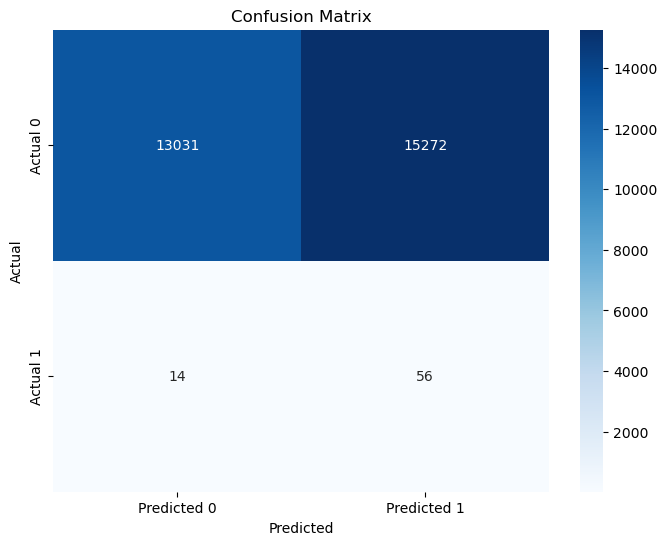

In [36]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, StratifiedKFold
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, roc_auc_score, confusion_matrix, precision_recall_fscore_support
from sklearn.feature_selection import RFE
from imblearn.under_sampling import RandomUnderSampler
from imblearn.pipeline import Pipeline
import seaborn as sns
import matplotlib.pyplot as plt

# Load data
df = custom_features_all

# Separate features and target
X = df.drop(columns=['Class'])
y = df['Class']

# Class Weights
class_weights = {
    0: 1,
    1: 400
}

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)

# Define the RandomForest model with class weights
model = RandomForestClassifier(class_weight=class_weights, random_state=42)

# Perform RFE with RandomForestClassifier as the estimator
rfe = RFE(estimator=RandomForestClassifier(random_state=42), n_features_to_select=30, step=1)

# Create a pipeline with RandomUnderSampler, standard scaler, RFE, and RandomForest classifier
pipeline = Pipeline([
    ('under', RandomUnderSampler(random_state=42)),
    ('scaler', StandardScaler()),
    ('rfe', rfe),
    ('classifier', model)
])

# Perform stratified k-fold cross-validation
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
for train_index, val_index in skf.split(X_train, y_train):
    X_train_fold, X_val_fold = X_train.iloc[train_index], X_train.iloc[val_index]
    y_train_fold, y_val_fold = y_train.iloc[train_index], y_train.iloc[val_index]

    pipeline.fit(X_train_fold, y_train_fold)
    y_val_pred = pipeline.predict(X_val_fold)
    print(classification_report(y_val_fold, y_val_pred))
    print(f"ROC-AUC: {roc_auc_score(y_val_fold, y_val_pred)}")

print("------------------------------")
# Train the final model on the full training set
pipeline.fit(X_train, y_train)

# Evaluate on the test set
y_test_pred = pipeline.predict(X_test)
print(classification_report(y_test, y_test_pred))
print(f"ROC-AUC: {roc_auc_score(y_test, y_test_pred)}")

# Optional: Adjust the probability threshold for predictions
y_test_proba = pipeline.predict_proba(X_test)[:, 1]
threshold = 0.35  # Example threshold, adjust based on your needs
y_test_pred_adjusted = (y_test_proba >= threshold).astype(int)
print(classification_report(y_test, y_test_pred_adjusted))
print(f"ROC-AUC: {roc_auc_score(y_test, y_test_pred_adjusted)}")

# Confusion Matrix and Analysis
conf_matrix = confusion_matrix(y_test, y_test_pred_adjusted)
tn, fp, fn, tp = conf_matrix.ravel()
precision, recall, f1, _ = precision_recall_fscore_support(y_test, y_test_pred_adjusted, average='binary')

print(f"Confusion Matrix:\n{conf_matrix}")
print(f"True Negatives: {tn}")
print(f"False Positives: {fp}")
print(f"False Negatives: {fn}")
print(f"True Positives: {tp}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1-Score: {f1}")

# Plotting the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Predicted 0', 'Predicted 1'], yticklabels=['Actual 0', 'Actual 1'])
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title('Confusion Matrix')
plt.show()

### with mrmr


In [12]:
%pip install Cython

Note: you may need to restart the kernel to use updated packages.


In [13]:
%pip install pymrmr

Note: you may need to restart the kernel to use updated packages.


Selected features: ['214', '216', '213', '211', '215', '209', '217', '212', '219', '210', '204', '206', '203', '221', '205', '208', '207', '218', '201', '220', '234', '236', '233', '231', '235', '229', '237', '232', '199', '230', '224', '226', '223', '222', '225', '228', '227', '202', '239', '200', '174', '176', '173', '171', '175', '169', '177', '172', '179', '170']
              precision    recall  f1-score   support

         0.0       1.00      0.74      0.85     22642
         1.0       0.00      0.49      0.01        57

    accuracy                           0.74     22699
   macro avg       0.50      0.61      0.43     22699
weighted avg       1.00      0.74      0.85     22699

ROC-AUC: 0.6143314628767839
Selected features: ['214', '216', '213', '211', '215', '209', '217', '212', '219', '210', '204', '206', '203', '221', '205', '208', '207', '218', '201', '220', '234', '236', '233', '231', '235', '229', '237', '232', '199', '230', '224', '226', '223', '222', '225', '228', '22

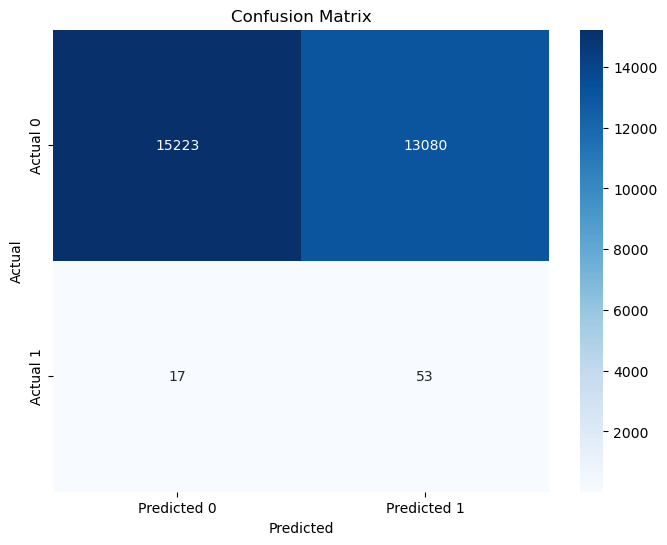

In [50]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, StratifiedKFold
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, roc_auc_score, confusion_matrix, precision_recall_fscore_support
from sklearn.base import BaseEstimator, TransformerMixin
from imblearn.under_sampling import RandomUnderSampler
from imblearn.pipeline import Pipeline
import seaborn as sns
import matplotlib.pyplot as plt
import pymrmr

# Custom transformer for MRMR feature selection
class MRMRFeatureSelector(BaseEstimator, TransformerMixin):
    def __init__(self, n_features_to_select=30):
        self.n_features_to_select = n_features_to_select
        self.selected_features = None
    
    def fit(self, X, y):
        # Ensure X is a DataFrame with string column names
        if not isinstance(X, pd.DataFrame):
            X = pd.DataFrame(X)
        X.columns = X.columns.astype(str)
        
        # Ensure y is a DataFrame with an appropriate name
        if not isinstance(y, pd.Series):
            y = pd.Series(y, name='target')
        else:
            y.name = 'target'
        
        # Concatenate X and y, and drop any NaN values
        df = pd.concat([X, y], axis=1).dropna()
        
        # Perform MRMR feature selection
        selected_features = pymrmr.mRMR(df, 'MIQ', self.n_features_to_select)
        self.selected_features = selected_features
        print(f"Selected features: {self.selected_features}")  # Debugging print
        return self
    
    def transform(self, X):
        # Convert X to DataFrame if it's not already
        if not isinstance(X, pd.DataFrame):
            X = pd.DataFrame(X)
        # Ensure X has the same column names as during fit
        X.columns = X.columns.astype(str)
        return X[self.selected_features]

# Load data
df = custom_features_all

# Separate features and target
X = df.drop(columns=['Class'])
y = df['Class']

# Class Weights
class_weights = {
    0: 1,
    1: 400
}

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)

# Define the RandomForest model with class weights
model = RandomForestClassifier(class_weight=class_weights, random_state=42)

# Create a pipeline with RandomUnderSampler, standard scaler, MRMR, and RandomForest classifier
pipeline = Pipeline([
    ('under', RandomUnderSampler(random_state=42)),
    ('scaler', StandardScaler()),
    ('mrmr', MRMRFeatureSelector(n_features_to_select=50)),
    ('classifier', model)
])

# Perform stratified k-fold cross-validation
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
for train_index, val_index in skf.split(X_train, y_train):
    X_train_fold, X_val_fold = X_train.iloc[train_index], X_train.iloc[val_index]
    y_train_fold, y_val_fold = y_train.iloc[train_index], y_train.iloc[val_index]

    pipeline.fit(X_train_fold, y_train_fold)
    y_val_pred = pipeline.predict(X_val_fold)
    print(classification_report(y_val_fold, y_val_pred))
    print(f"ROC-AUC: {roc_auc_score(y_val_fold, y_val_pred)}")

print("------------------------------")
# Train the final model on the full training set
pipeline.fit(X_train, y_train)

# Evaluate on the test set
y_test_pred = pipeline.predict(X_test)
print(classification_report(y_test, y_test_pred))
print(f"ROC-AUC: {roc_auc_score(y_test, y_test_pred)}")

# Optional: Adjust the probability threshold for predictions
y_test_proba = pipeline.predict_proba(X_test)[:, 1]
threshold = 0.41  # Example threshold, adjust based on your needs
y_test_pred_adjusted = (y_test_proba >= threshold).astype(int)
print(classification_report(y_test, y_test_pred_adjusted))
print(f"ROC-AUC: {roc_auc_score(y_test, y_test_pred_adjusted)}")

# Confusion Matrix and Analysis
conf_matrix = confusion_matrix(y_test, y_test_pred_adjusted)
tn, fp, fn, tp = conf_matrix.ravel()
precision, recall, f1, _ = precision_recall_fscore_support(y_test, y_test_pred_adjusted, average='binary')

print(f"Confusion Matrix:\n{conf_matrix}")
print(f"True Negatives: {tn}")
print(f"False Positives: {fp}")
print(f"False Negatives: {fn}")
print(f"True Positives: {tp}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1-Score: {f1}")

# Plotting the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Predicted 0', 'Predicted 1'], yticklabels=['Actual 0', 'Actual 1'])
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title('Confusion Matrix')
plt.show()

Selected features: ['214', '216', '213', '211', '215', '209', '217', '212', '219', '210', '204', '206', '203', '221', '205', '208', '207', '218', '201', '220', '234', '236', '233', '231', '235', '229', '237', '232', '199', '230', '224', '226', '223', '222', '225', '228', '227', '202', '239', '200', '174', '176', '173', '171', '175', '169', '177', '172', '179', '170']
              precision    recall  f1-score   support

         0.0       1.00      0.74      0.85     22642
         1.0       0.00      0.47      0.01        57

    accuracy                           0.74     22699
   macro avg       0.50      0.61      0.43     22699
weighted avg       1.00      0.74      0.85     22699

ROC-AUC: 0.6057803616009372
Selected features: ['214', '216', '213', '211', '215', '209', '217', '212', '219', '210', '204', '206', '203', '221', '205', '208', '207', '218', '201', '220', '234', '236', '233', '231', '235', '229', '237', '232', '199', '230', '224', '226', '223', '222', '225', '228', '22

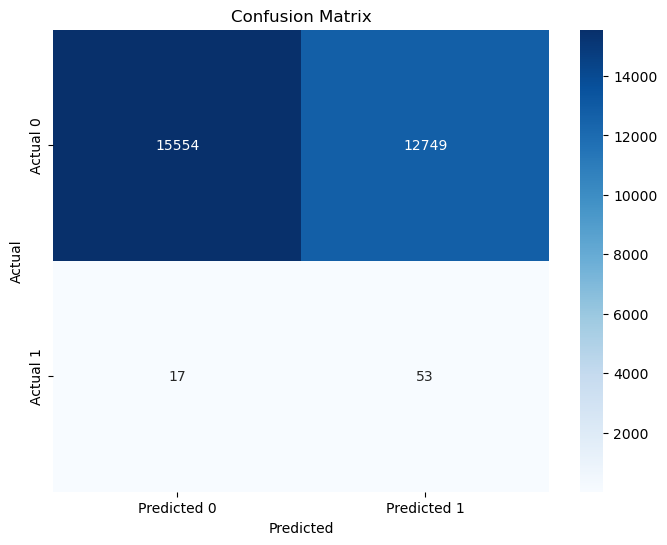

In [7]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, StratifiedKFold
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, roc_auc_score, confusion_matrix, precision_recall_fscore_support
from sklearn.base import BaseEstimator, TransformerMixin
from imblearn.under_sampling import RandomUnderSampler
from imblearn.pipeline import Pipeline
import seaborn as sns
import matplotlib.pyplot as plt
import pymrmr

# Custom transformer for MRMR feature selection
class MRMRFeatureSelector(BaseEstimator, TransformerMixin):
    def __init__(self, n_features_to_select=30):
        self.n_features_to_select = n_features_to_select
        self.selected_features = None
    
    def fit(self, X, y):
        # Ensure X is a DataFrame with string column names
        if not isinstance(X, pd.DataFrame):
            X = pd.DataFrame(X)
        X.columns = X.columns.astype(str)
        
        # Ensure y is a DataFrame with an appropriate name
        if not isinstance(y, pd.Series):
            y = pd.Series(y, name='target')
        else:
            y.name = 'target'
        
        # Concatenate X and y, and drop any NaN values
        df = pd.concat([X, y], axis=1).dropna()
        
        # Perform MRMR feature selection
        selected_features = pymrmr.mRMR(df, 'MIQ', self.n_features_to_select)
        self.selected_features = selected_features
        print(f"Selected features: {self.selected_features}")  # Debugging print
        return self
    
    def transform(self, X):
        # Convert X to DataFrame if it's not already
        if not isinstance(X, pd.DataFrame):
            X = pd.DataFrame(X)
        # Ensure X has the same column names as during fit
        X.columns = X.columns.astype(str)
        return X[self.selected_features]

# Load data
df = custom_features_all

# Separate features and target
X = df.drop(columns=['Class'])
y = df['Class']

# Class Weights
class_weights = {
    0: 1,
    1: 400
}

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)

# Define the RandomForest model with class weights
model_rf = RandomForestClassifier(
    class_weight=class_weights,
    random_state=42,
    bootstrap=True,
    max_depth=None,
    min_samples_leaf=1,
    min_samples_split=2,
    n_estimators=50
)
# Best param in GridSearch 'classifier__bootstrap': True, 'classifier__max_depth': None, 'classifier__min_samples_leaf': 1, 'classifier__min_samples_split': 2, 'classifier__n_estimators': 50

# Create a pipeline with RandomUnderSampler, standard scaler, MRMR, and RandomForest classifier
pipeline_rf_gs= Pipeline([
    ('under', RandomUnderSampler(random_state=42)),
    ('scaler', StandardScaler()),
    ('mrmr', MRMRFeatureSelector(n_features_to_select=50)),
    ('classifier', model_rf)
])

# Perform stratified k-fold cross-validation
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
for train_index, val_index in skf.split(X_train, y_train):
    X_train_fold, X_val_fold = X_train.iloc[train_index], X_train.iloc[val_index]
    y_train_fold, y_val_fold = y_train.iloc[train_index], y_train.iloc[val_index]

    pipeline_rf_gs.fit(X_train_fold, y_train_fold)
    y_val_pred = pipeline_rf_gs.predict(X_val_fold)
    print(classification_report(y_val_fold, y_val_pred))
    print(f"ROC-AUC: {roc_auc_score(y_val_fold, y_val_pred)}")

print("------------------------------")
# Train the final model on the full training set
pipeline_rf_gs.fit(X_train, y_train)

# Evaluate on the test set
y_test_pred = pipeline_rf_gs.predict(X_test)
print(classification_report(y_test, y_test_pred))
print(f"ROC-AUC: {roc_auc_score(y_test, y_test_pred)}")

# Optional: Adjust the probability threshold for predictions
y_test_proba = pipeline_rf_gs.predict_proba(X_test)[:, 1]
threshold = 0.41  # Example threshold, adjust based on your needs
y_test_pred_adjusted = (y_test_proba >= threshold).astype(int)
print(classification_report(y_test, y_test_pred_adjusted))
print(f"ROC-AUC: {roc_auc_score(y_test, y_test_pred_adjusted)}")

# Confusion Matrix and Analysis
conf_matrix = confusion_matrix(y_test, y_test_pred_adjusted)
tn, fp, fn, tp = conf_matrix.ravel()
precision, recall, f1, _ = precision_recall_fscore_support(y_test, y_test_pred_adjusted, average='binary')

print(f"Confusion Matrix:\n{conf_matrix}")
print(f"True Negatives: {tn}")
print(f"False Positives: {fp}")
print(f"False Negatives: {fn}")
print(f"True Positives: {tp}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1-Score: {f1}")

# Plotting the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Predicted 0', 'Predicted 1'], yticklabels=['Actual 0', 'Actual 1'])
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title('Confusion Matrix')
plt.show()


#### try on subset8 test

Selected features: ['214', '216', '213', '211', '215', '209', '217', '212', '219', '210', '204', '206', '203', '221', '205', '208', '207', '218', '201', '220', '234', '236', '233', '231', '235', '229', '237', '232', '199', '230', '224', '226', '223', '222', '225', '228', '227', '202', '239', '200', '174', '176', '173', '171', '175', '169', '177', '172', '179', '170']
              precision    recall  f1-score   support

         0.0       1.00      0.74      0.85     22642
         1.0       0.00      0.47      0.01        57

    accuracy                           0.74     22699
   macro avg       0.50      0.61      0.43     22699
weighted avg       1.00      0.74      0.85     22699

ROC-AUC: 0.6057803616009372
Selected features: ['214', '216', '213', '211', '215', '209', '217', '212', '219', '210', '204', '206', '203', '221', '205', '208', '207', '218', '201', '220', '234', '236', '233', '231', '235', '229', '237', '232', '199', '230', '224', '226', '223', '222', '225', '228', '22

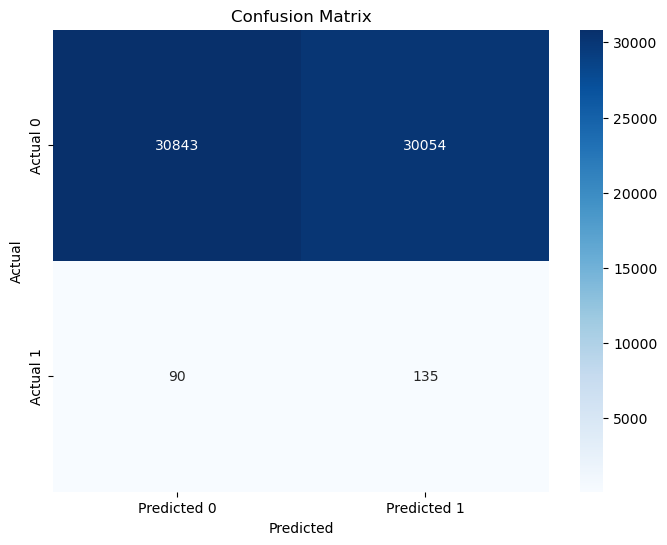

In [101]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, StratifiedKFold
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, roc_auc_score, confusion_matrix, precision_recall_fscore_support
from sklearn.base import BaseEstimator, TransformerMixin
from imblearn.under_sampling import RandomUnderSampler
from imblearn.pipeline import Pipeline
import seaborn as sns
import matplotlib.pyplot as plt
import pymrmr

# Custom transformer for MRMR feature selection
class MRMRFeatureSelector(BaseEstimator, TransformerMixin):
    def __init__(self, n_features_to_select=30):
        self.n_features_to_select = n_features_to_select
        self.selected_features = None
    
    def fit(self, X, y):
        # Ensure X is a DataFrame with string column names
        if not isinstance(X, pd.DataFrame):
            X = pd.DataFrame(X)
        X.columns = X.columns.astype(str)
        
        # Ensure y is a Series
        if not isinstance(y, pd.Series):
            y = pd.Series(y, name='target')
        
        # Concatenate X and y, and drop any NaN values
        df = pd.concat([X, y], axis=1).dropna()
        
        # Perform MRMR feature selection
        selected_features = pymrmr.mRMR(df, 'MIQ', self.n_features_to_select)
        self.selected_features = selected_features
        print(f"Selected features: {self.selected_features}")  # Debugging print
        return self
    
    def transform(self, X):
        # Convert X to DataFrame if it's not already
        if not isinstance(X, pd.DataFrame):
            X = pd.DataFrame(X)
        # Ensure X has the same column names as during fit
        X.columns = X.columns.astype(str)
        return X[self.selected_features]

# Load data
df = custom_features_all

# Separate features and target
X = df.drop(columns=['Class'])
y = df['Class']

# Class Weights
class_weights = {
    0: 1,
    1: 400
}

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)

# Define the RandomForest model with class weights
model_rf = RandomForestClassifier(
    class_weight=class_weights,
    random_state=42,
    bootstrap=True,
    max_depth=None,
    min_samples_leaf=1,
    min_samples_split=2,
    n_estimators=50
)
# Best param in GridSearch 'classifier__bootstrap': True, 'classifier__max_depth': None, 'classifier__min_samples_leaf': 1, 'classifier__min_samples_split': 2, 'classifier__n_estimators': 50

# Create a pipeline with RandomUnderSampler, standard scaler, MRMR, and RandomForest classifier
pipeline_rf_gs = Pipeline([
    ('under', RandomUnderSampler(random_state=42)),
    ('scaler', StandardScaler()),
    ('mrmr', MRMRFeatureSelector(n_features_to_select=50)),
    ('classifier', model_rf)
])

# Perform stratified k-fold cross-validation
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
for train_index, val_index in skf.split(X_train, y_train):
    X_train_fold, X_val_fold = X_train.iloc[train_index], X_train.iloc[val_index]
    y_train_fold, y_val_fold = y_train.iloc[train_index], y_train.iloc[val_index]

    pipeline_rf_gs.fit(X_train_fold, y_train_fold)
    y_val_pred = pipeline_rf_gs.predict(X_val_fold)
    print(classification_report(y_val_fold, y_val_pred))
    print(f"ROC-AUC: {roc_auc_score(y_val_fold, y_val_pred)}")

print("------------------------------")
# Train the final model on the full training set
pipeline_rf_gs.fit(X_train, y_train)

# Separate features and target in the new test set
X_new_test = custom_features8.drop(columns=['Class'])
y_new_test = custom_features8['Class']

# Evaluate on the new test set
y_new_test_pred = pipeline_rf_gs.predict(X_new_test)
print(classification_report(y_new_test, y_new_test_pred))
print(f"ROC-AUC: {roc_auc_score(y_new_test, y_new_test_pred)}")

# Optional: Adjust the probability threshold for predictions
y_new_test_proba = pipeline_rf_gs.predict_proba(X_new_test)[:, 1]
threshold = 0.366  # Example threshold, adjust based on your needs
y_new_test_pred_adjusted = (y_new_test_proba >= threshold).astype(int)
print(classification_report(y_new_test, y_new_test_pred_adjusted))
print(f"ROC-AUC: {roc_auc_score(y_new_test, y_new_test_pred_adjusted)}")

# Confusion Matrix and Analysis
conf_matrix = confusion_matrix(y_new_test, y_new_test_pred_adjusted)
tn, fp, fn, tp = conf_matrix.ravel()
precision, recall, f1, _ = precision_recall_fscore_support(y_new_test, y_new_test_pred_adjusted, average='binary')

print(f"Confusion Matrix:\n{conf_matrix}")
print(f"True Negatives: {tn}")
print(f"False Positives: {fp}")
print(f"False Negatives: {fn}")
print(f"True Positives: {tp}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1-Score: {f1}")
print(f"SENSITIVITY: {conf_matrix[1,1]/sum(conf_matrix[1,:])}")
print(f"SPECIFICITY: {conf_matrix[0,0]/sum(conf_matrix[0,:])}")

# Plotting the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Predicted 0', 'Predicted 1'], yticklabels=['Actual 0', 'Actual 1'])
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title('Confusion Matrix')
plt.show()


#### with oversampling

Selected features: ['214', '216', '213', '211', '215', '209', '217', '212', '219', '210', '204', '206', '203', '221', '205', '208', '207', '218', '201', '220', '234', '236', '233', '231', '235', '229', '237', '232', '199', '230', '224', '226', '223', '222', '225', '228', '227', '202', '239', '200', '174', '176', '173', '171', '175', '169', '177', '172', '179', '170']
              precision    recall  f1-score   support

         0.0       1.00      0.74      0.85     22642
         1.0       0.00      0.47      0.01        57

    accuracy                           0.74     22699
   macro avg       0.50      0.61      0.43     22699
weighted avg       1.00      0.74      0.85     22699

ROC-AUC: 0.6057803616009372
Selected features: ['214', '216', '213', '211', '215', '209', '217', '212', '219', '210', '204', '206', '203', '221', '205', '208', '207', '218', '201', '220', '234', '236', '233', '231', '235', '229', '237', '232', '199', '230', '224', '226', '223', '222', '225', '228', '22

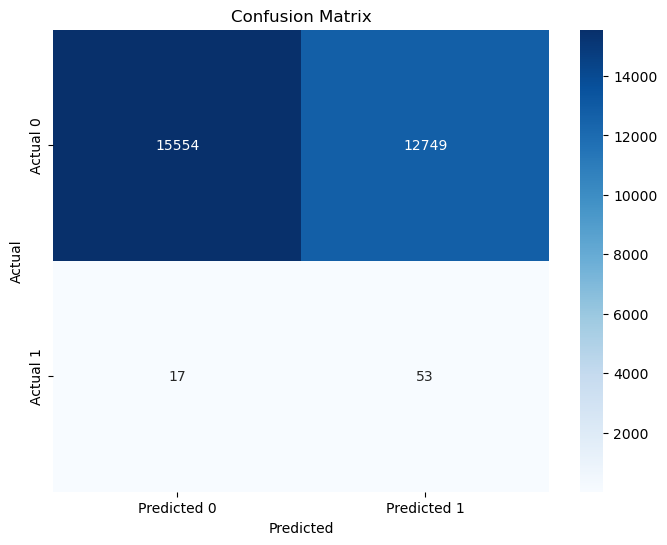

In [31]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, StratifiedKFold
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, roc_auc_score, confusion_matrix, precision_recall_fscore_support
from sklearn.base import BaseEstimator, TransformerMixin
from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling import ADASYN
from imblearn.pipeline import Pipeline
import seaborn as sns
import matplotlib.pyplot as plt
import pymrmr

# Custom transformer for MRMR feature selection
class MRMRFeatureSelector(BaseEstimator, TransformerMixin):
    def __init__(self, n_features_to_select=30):
        self.n_features_to_select = n_features_to_select
        self.selected_features = None
    
    def fit(self, X, y):
        # Ensure X is a DataFrame with string column names
        if not isinstance(X, pd.DataFrame):
            X = pd.DataFrame(X)
        X.columns = X.columns.astype(str)
        
        # Ensure y is a Series
        if not isinstance(y, pd.Series):
            y = pd.Series(y, name='target')
        
        # Concatenate X and y, and drop any NaN values
        df = pd.concat([X, y], axis=1).dropna()
        
        # Perform MRMR feature selection
        selected_features = pymrmr.mRMR(df, 'MIQ', self.n_features_to_select)
        self.selected_features = selected_features
        print(f"Selected features: {self.selected_features}")  # Debugging print
        return self
    
    def transform(self, X):
        # Convert X to DataFrame if it's not already
        if not isinstance(X, pd.DataFrame):
            X = pd.DataFrame(X)
        # Ensure X has the same column names as during fit
        X.columns = X.columns.astype(str)
        return X[self.selected_features]

# Load data
df = custom_features_all

# Separate features and target
X = df.drop(columns=['Class'])
y = df['Class']

# Class Weights
class_weights = {
    0: 1,
    1: 400
}

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)

# Define the RandomForest model with class weights
model_rf = RandomForestClassifier(
    class_weight=class_weights,
    random_state=42,
    bootstrap=True,
    max_depth=None,
    min_samples_leaf=1,
    min_samples_split=2,
    n_estimators=50
)
# Best param in GridSearch 'classifier__bootstrap': True, 'classifier__max_depth': None, 'classifier__min_samples_leaf': 1, 'classifier__min_samples_split': 2, 'classifier__n_estimators': 50

# Create a pipeline with RandomUnderSampler, ADASYN, standard scaler, MRMR, and RandomForest classifier
pipeline_rf_gs = Pipeline([
    ('under', RandomUnderSampler(random_state=42)),
    ('scaler', StandardScaler()),
    ('mrmr', MRMRFeatureSelector(n_features_to_select=50)),
    ('over', ADASYN(random_state=42)),
    ('classifier', model_rf)
])

# Perform stratified k-fold cross-validation
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
for train_index, val_index in skf.split(X_train, y_train):
    X_train_fold, X_val_fold = X_train.iloc[train_index], X_train.iloc[val_index]
    y_train_fold, y_val_fold = y_train.iloc[train_index], y_train.iloc[val_index]

    pipeline_rf_gs.fit(X_train_fold, y_train_fold)
    y_val_pred = pipeline_rf_gs.predict(X_val_fold)
    print(classification_report(y_val_fold, y_val_pred))
    print(f"ROC-AUC: {roc_auc_score(y_val_fold, y_val_pred)}")

print("------------------------------")
# Train the final model on the full training set
pipeline_rf_gs.fit(X_train, y_train)

# Evaluate on the test set
y_test_pred = pipeline_rf_gs.predict(X_test)
print(classification_report(y_test, y_test_pred))
print(f"ROC-AUC: {roc_auc_score(y_test, y_test_pred)}")

# Adjust the probability threshold for predictions
y_test_proba = pipeline_rf_gs.predict_proba(X_test)[:, 1]
threshold = 0.41  # Example threshold, adjust based on your needs
y_test_pred_adjusted = (y_test_proba >= threshold).astype(int)
print("With adjusted threshold:")
print(classification_report(y_test, y_test_pred_adjusted))
print(f"ROC-AUC: {roc_auc_score(y_test, y_test_pred_adjusted)}")

# Confusion Matrix and Analysis
conf_matrix = confusion_matrix(y_test, y_test_pred_adjusted)
tn, fp, fn, tp = conf_matrix.ravel()
precision, recall, f1, _ = precision_recall_fscore_support(y_test, y_test_pred_adjusted, average='binary')

print(f"Confusion Matrix:\n{conf_matrix}")
print(f"True Negatives: {tn}")
print(f"False Positives: {fp}")
print(f"False Negatives: {fn}")
print(f"True Positives: {tp}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1-Score: {f1}")

# Plotting the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Predicted 0', 'Predicted 1'], yticklabels=['Actual 0', 'Actual 1'])
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title('Confusion Matrix')
plt.show()


### With GridSearch

e:\mp-anaconda3\envs\hm\Lib\site-packages\sklearn\model_selection\_validation.py:547: FitFailedWarning: 
216 fits failed out of a total of 1080.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
216 fits failed with the following error:
Traceback (most recent call last):
  File "e:\mp-anaconda3\envs\hm\Lib\site-packages\sklearn\model_selection\_validation.py", line 895, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "e:\mp-anaconda3\envs\hm\Lib\site-packages\sklearn\base.py", line 1474, in wrapper
    return fit_method(estimator, *args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "e:\mp-anaconda3\envs\hm\Lib\site-packages\imblearn\pipeline.py", line 322, in fit
    Xt, yt = self._fit(X, y,

Selected features: ['214', '211', '218', '217', '216', '215', '221', '212', '223', '210', '209', '206', '205', '220', '203', '222', '233', '229', '239', '236', '235', '234', '199', '230', '224', '228', '227', '226', '225', '204', '241', '200', '173', '166', '178', '176', '175', '174', '180', '167', '182', '165', '137', '136', '132', '179', '245', '181', '191', '189']
Best Parameters: {'classifier__bootstrap': True, 'classifier__max_depth': None, 'classifier__min_samples_leaf': 1, 'classifier__min_samples_split': 2, 'classifier__n_estimators': 50}
Best ROC-AUC Score: nan
              precision    recall  f1-score   support

         0.0       1.00      0.71      0.83     28303
         1.0       0.01      0.60      0.01        70

    accuracy                           0.71     28373
   macro avg       0.50      0.65      0.42     28373
weighted avg       1.00      0.71      0.82     28373

ROC-AUC: 0.652683461117196
              precision    recall  f1-score   support

         0.0  

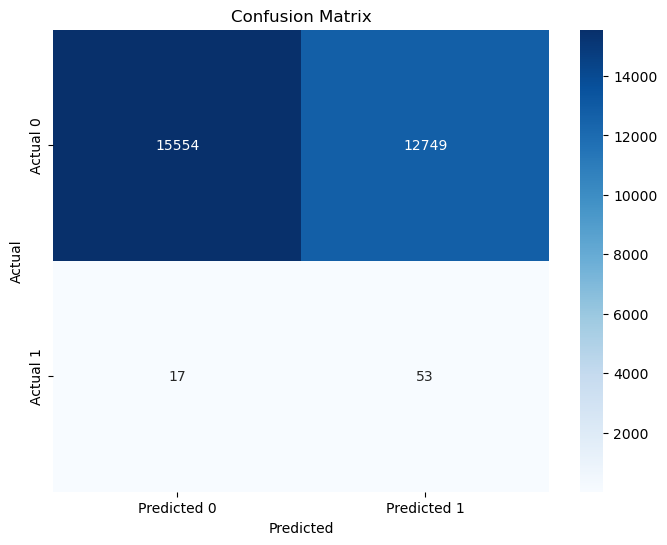

In [54]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, StratifiedKFold, GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, roc_auc_score, confusion_matrix, precision_recall_fscore_support
from sklearn.base import BaseEstimator, TransformerMixin
from imblearn.under_sampling import RandomUnderSampler
from imblearn.pipeline import Pipeline
import seaborn as sns
import matplotlib.pyplot as plt
import pymrmr

# Custom transformer for MRMR feature selection
class MRMRFeatureSelector(BaseEstimator, TransformerMixin):
    def __init__(self, n_features_to_select=30):
        self.n_features_to_select = n_features_to_select
        self.selected_features = None
    
    def fit(self, X, y):
        # Ensure X is a DataFrame with string column names
        if not isinstance(X, pd.DataFrame):
            X = pd.DataFrame(X)
        X.columns = X.columns.astype(str)
        
        # Ensure y is a DataFrame with an appropriate name
        if not isinstance(y, pd.Series):
            y = pd.Series(y, name='target')
        else:
            y.name = 'target'
        
        # Concatenate X and y, and drop any NaN values
        df = pd.concat([X, y], axis=1).dropna()
        
        # Perform MRMR feature selection
        selected_features = pymrmr.mRMR(df, 'MIQ', self.n_features_to_select)
        self.selected_features = selected_features
        print(f"Selected features: {self.selected_features}")  # Debugging print
        return self
    
    def transform(self, X):
        # Convert X to DataFrame if it's not already
        if not isinstance(X, pd.DataFrame):
            X = pd.DataFrame(X)
        # Ensure X has the same column names as during fit
        X.columns = X.columns.astype(str)
        return X[self.selected_features]

# Load data
df = custom_features_all

# Separate features and target
X = df.drop(columns=['Class'])
y = df['Class']

# Class Weights
class_weights = {
    0: 1,
    1: 400
}

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)

# Define the pipeline with RandomUnderSampler, standard scaler, MRMR, and RandomForest classifier
pipeline = Pipeline([
    ('under', RandomUnderSampler(random_state=42)),
    ('scaler', StandardScaler()),
    ('mrmr', MRMRFeatureSelector(n_features_to_select=50)),
    ('classifier', RandomForestClassifier(class_weight=class_weights, random_state=42))
])

# Define the parameter grid for GridSearchCV
param_grid = {
    'classifier__n_estimators': [50, 100, 200],
    'classifier__max_depth': [None, 10, 20, 30],
    'classifier__min_samples_split': [2, 5, 10],
    'classifier__min_samples_leaf': [1, 2, 4],
    'classifier__bootstrap': [True, False]
}

# Set up the GridSearchCV
grid_search = GridSearchCV(estimator=pipeline, param_grid=param_grid, cv=5, n_jobs=-1, scoring='roc_auc')

# Perform the grid search
grid_search.fit(X_train, y_train)

# Print the best parameters and best score
print(f"Best Parameters: {grid_search.best_params_}")
print(f"Best ROC-AUC Score: {grid_search.best_score_}")

# Evaluate the best model on the test set
best_model = grid_search.best_estimator_
y_test_pred = best_model.predict(X_test)
print(classification_report(y_test, y_test_pred))
print(f"ROC-AUC: {roc_auc_score(y_test, y_test_pred)}")

# Optional: Adjust the probability threshold for predictions
y_test_proba = best_model.predict_proba(X_test)[:, 1]
threshold = 0.41  # Example threshold, adjust based on your needs
y_test_pred_adjusted = (y_test_proba >= threshold).astype(int)
print(classification_report(y_test, y_test_pred_adjusted))
print(f"ROC-AUC: {roc_auc_score(y_test, y_test_pred_adjusted)}")

# Confusion Matrix and Analysis
conf_matrix = confusion_matrix(y_test, y_test_pred_adjusted)
tn, fp, fn, tp = conf_matrix.ravel()
precision, recall, f1, _ = precision_recall_fscore_support(y_test, y_test_pred_adjusted, average='binary')

print(f"Confusion Matrix:\n{conf_matrix}")
print(f"True Negatives: {tn}")
print(f"False Positives: {fp}")
print(f"False Negatives: {fn}")
print(f"True Positives: {tp}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1-Score: {f1}")

# Plotting the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Predicted 0', 'Predicted 1'], yticklabels=['Actual 0', 'Actual 1'])
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title('Confusion Matrix')
plt.show()

## SVM

#### SVM with rfe

In [13]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, StratifiedKFold
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, roc_auc_score
from sklearn.feature_selection import RFE
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
from imblearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier

# Load data
df = custom_features_all

# Separate features and target
X = df.drop(columns=['Class'])
y = df['Class']

#Class Weights
class_weights = {
    0:1,1:100
}

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)

# Define the SVM model with class weights
model = SVC(probability=True, class_weight=class_weights, random_state=42)

# Perform RFE with RandomForestClassifier as the estimator
rfe = RFE(estimator=RandomForestClassifier(random_state=42), n_features_to_select=30, step=1)

# Create a pipeline with SMOTE, RandomUnderSampler, RFE, standard scaler, and SVM classifier
pipeline = Pipeline([
    ('under', RandomUnderSampler(random_state=42)),
    ('scaler', StandardScaler()),
    ('rfe', rfe),
    ('classifier', model)
])

# Perform stratified k-fold cross-validation
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
for train_index, val_index in skf.split(X_train, y_train):
    X_train_fold, X_val_fold = X_train.iloc[train_index], X_train.iloc[val_index]
    y_train_fold, y_val_fold = y_train.iloc[train_index], y_train.iloc[val_index]

    pipeline.fit(X_train_fold, y_train_fold)
    y_val_pred = pipeline.predict(X_val_fold)
    print(classification_report(y_val_fold, y_val_pred))
    print(f"ROC-AUC: {roc_auc_score(y_val_fold, y_val_pred)}")

print("------------------------------")
# Train the final model on the full training set
pipeline.fit(X_train, y_train)

# Evaluate on the test set
y_test_pred = pipeline.predict(X_test)
print(classification_report(y_test, y_test_pred))
print(f"ROC-AUC: {roc_auc_score(y_test, y_test_pred)}")

# Optional: Adjust the probability threshold for predictions
y_test_proba = pipeline.predict_proba(X_test)[:, 1]
threshold = 0.3  # Example threshold, adjust based on your needs
y_test_pred_adjusted = (y_test_proba >= threshold).astype(int)
print(classification_report(y_test, y_test_pred_adjusted))
print(f"ROC-AUC: {roc_auc_score(y_test, y_test_pred_adjusted)}")


              precision    recall  f1-score   support

         0.0       1.00      0.23      0.38     22642
         1.0       0.00      0.96      0.01        57

    accuracy                           0.23     22699
   macro avg       0.50      0.60      0.19     22699
weighted avg       1.00      0.23      0.37     22699

ROC-AUC: 0.597905305618963
              precision    recall  f1-score   support

         0.0       1.00      0.27      0.43     22642
         1.0       0.00      0.88      0.01        56

    accuracy                           0.27     22698
   macro avg       0.50      0.57      0.22     22698
weighted avg       1.00      0.27      0.43     22698

ROC-AUC: 0.5737291317021465
              precision    recall  f1-score   support

         0.0       1.00      0.26      0.42     22642
         1.0       0.00      0.98      0.01        56

    accuracy                           0.27     22698
   macro avg       0.50      0.62      0.21     22698
weighted avg       

              precision    recall  f1-score   support

         0.0       1.00      0.23      0.38     22642
         1.0       0.00      0.95      0.01        57

    accuracy                           0.23     22699
   macro avg       0.50      0.59      0.19     22699
weighted avg       1.00      0.23      0.38     22699

ROC-AUC: 0.5896191986015742
              precision    recall  f1-score   support

         0.0       1.00      0.31      0.48     22642
         1.0       0.00      0.88      0.01        56

    accuracy                           0.31     22698
   macro avg       0.50      0.59      0.24     22698
weighted avg       1.00      0.31      0.47     22698

ROC-AUC: 0.593537452521862
              precision    recall  f1-score   support

         0.0       1.00      0.28      0.44     22642
         1.0       0.00      0.93      0.01        56

    accuracy                           0.28     22698
   macro avg       0.50      0.60      0.22     22698
weighted avg       

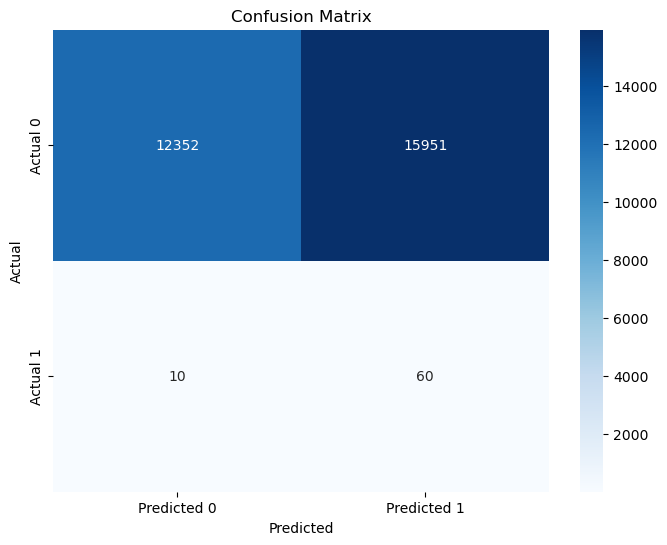

In [96]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, StratifiedKFold
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, roc_auc_score, confusion_matrix, precision_recall_fscore_support
from sklearn.feature_selection import RFE
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
from imblearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
import seaborn as sns
import matplotlib.pyplot as plt

# Load data
df = custom_features_all

# Separate features and target
X = df.drop(columns=['Class'])
y = df['Class']

# Class Weights
class_weights = {
    0: 1,
    1: 100
}

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)

# Define the SVM model with class weights
model = SVC(probability=True, class_weight=class_weights, random_state=42)

# Perform RFE with RandomForestClassifier as the estimator
rfe = RFE(estimator=RandomForestClassifier(random_state=42), n_features_to_select=50, step=1)

# Create a pipeline with SMOTE, RandomUnderSampler, RFE, standard scaler, and SVM classifier
pipeline = Pipeline([
    ('under', RandomUnderSampler(random_state=42)),
    ('scaler', StandardScaler()),
    ('rfe', rfe),
    ('classifier', model)
])

# Perform stratified k-fold cross-validation
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
for train_index, val_index in skf.split(X_train, y_train):
    X_train_fold, X_val_fold = X_train.iloc[train_index], X_train.iloc[val_index]
    y_train_fold, y_val_fold = y_train.iloc[train_index], y_train.iloc[val_index]

    pipeline.fit(X_train_fold, y_train_fold)
    y_val_pred = pipeline.predict(X_val_fold)
    print(classification_report(y_val_fold, y_val_pred))
    print(f"ROC-AUC: {roc_auc_score(y_val_fold, y_val_pred)}")

print("------------------------------")
# Train the final model on the full training set
pipeline.fit(X_train, y_train)

# Evaluate on the test set
y_test_pred = pipeline.predict(X_test)
print(classification_report(y_test, y_test_pred))
print(f"ROC-AUC: {roc_auc_score(y_test, y_test_pred)}")

# Optional: Adjust the probability threshold for predictions
y_test_proba = pipeline.predict_proba(X_test)[:, 1]
threshold = 0.41  # Example threshold, adjust based on your needs
y_test_pred_adjusted = (y_test_proba >= threshold).astype(int)
print(classification_report(y_test, y_test_pred_adjusted))
print(f"ROC-AUC: {roc_auc_score(y_test, y_test_pred_adjusted)}")

# Confusion Matrix and Analysis
conf_matrix = confusion_matrix(y_test, y_test_pred_adjusted)
tn, fp, fn, tp = conf_matrix.ravel()
precision, recall, f1, _ = precision_recall_fscore_support(y_test, y_test_pred_adjusted, average='binary')

print(f"Confusion Matrix:\n{conf_matrix}")
print(f"True Negatives: {tn}")
print(f"False Positives: {fp}")
print(f"False Negatives: {fn}")
print(f"True Positives: {tp}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1-Score: {f1}")

# Plotting the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Predicted 0', 'Predicted 1'], yticklabels=['Actual 0', 'Actual 1'])
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title('Confusion Matrix')
plt.show()


#### Try diff thresholds

              precision    recall  f1-score   support

         0.0       1.00      0.25      0.40     28303
         1.0       0.00      0.94      0.01        70

    accuracy                           0.25     28373
   macro avg       0.50      0.59      0.20     28373
weighted avg       1.00      0.25      0.40     28373

ROC-AUC: 0.5949667122616986
              precision    recall  f1-score   support

         0.0       1.00      0.52      0.68     28303
         1.0       0.00      0.81      0.01        70

    accuracy                           0.52     28373
   macro avg       0.50      0.67      0.35     28373
weighted avg       1.00      0.52      0.68     28373

ROC-AUC: 0.6667266468471288
Confusion Matrix:
[[14694 13609]
 [   13    57]]
True Negatives: 14694
False Positives: 13609
False Negatives: 13
True Positives: 57
Precision: 0.00417093516756915
Recall: 0.8142857142857143
F1-Score: 0.008299359347699476


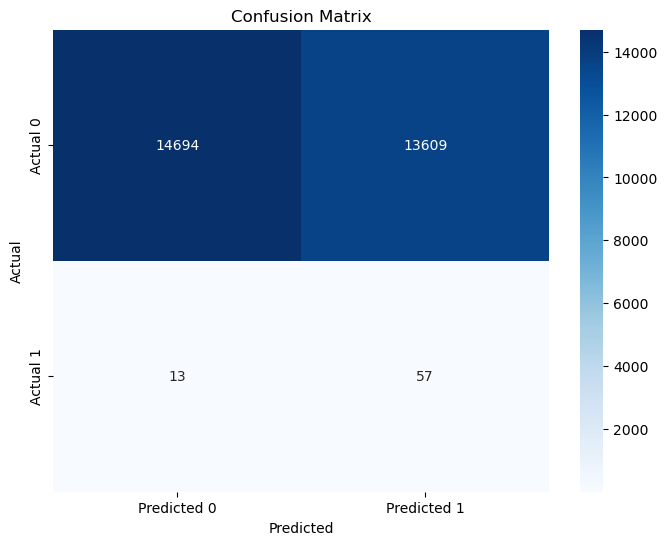

In [97]:
# Evaluate on the test set
y_test_pred = pipeline.predict(X_test)
print(classification_report(y_test, y_test_pred))
print(f"ROC-AUC: {roc_auc_score(y_test, y_test_pred)}")

# Optional: Adjust the probability threshold for predictions
y_test_proba = pipeline.predict_proba(X_test)[:, 1]
threshold = 0.46  # Example threshold, adjust based on your needs
y_test_pred_adjusted = (y_test_proba >= threshold).astype(int)
print(classification_report(y_test, y_test_pred_adjusted))
print(f"ROC-AUC: {roc_auc_score(y_test, y_test_pred_adjusted)}")

# Confusion Matrix and Analysis
conf_matrix = confusion_matrix(y_test, y_test_pred_adjusted)
tn, fp, fn, tp = conf_matrix.ravel()
precision, recall, f1, _ = precision_recall_fscore_support(y_test, y_test_pred_adjusted, average='binary')

print(f"Confusion Matrix:\n{conf_matrix}")
print(f"True Negatives: {tn}")
print(f"False Positives: {fp}")
print(f"False Negatives: {fn}")
print(f"True Positives: {tp}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1-Score: {f1}")

# Plotting the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Predicted 0', 'Predicted 1'], yticklabels=['Actual 0', 'Actual 1'])
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title('Confusion Matrix')
plt.show()

#### Try on subset8 testing

              precision    recall  f1-score   support

         0.0       1.00      0.22      0.36     60897
         1.0       0.00      0.94      0.01       225

    accuracy                           0.22     61122
   macro avg       0.50      0.58      0.19     61122
weighted avg       1.00      0.22      0.36     61122

ROC-AUC: 0.5798303145748833
              precision    recall  f1-score   support

         0.0       1.00      0.53      0.69     60897
         1.0       0.00      0.64      0.01       225

    accuracy                           0.53     61122
   macro avg       0.50      0.58      0.35     61122
weighted avg       0.99      0.53      0.69     61122

ROC-AUC: 0.5840881050516993
Confusion Matrix:
[[32435 28462]
 [   82   143]]
True Negatives: 32435
False Positives: 28462
False Negatives: 82
True Positives: 143
Precision: 0.004999126026918371
Recall: 0.6355555555555555
F1-Score: 0.009920221990981616
SENSITIVITY: 0.6355555555555555
SPECIFICITY: 0.5326206545478431


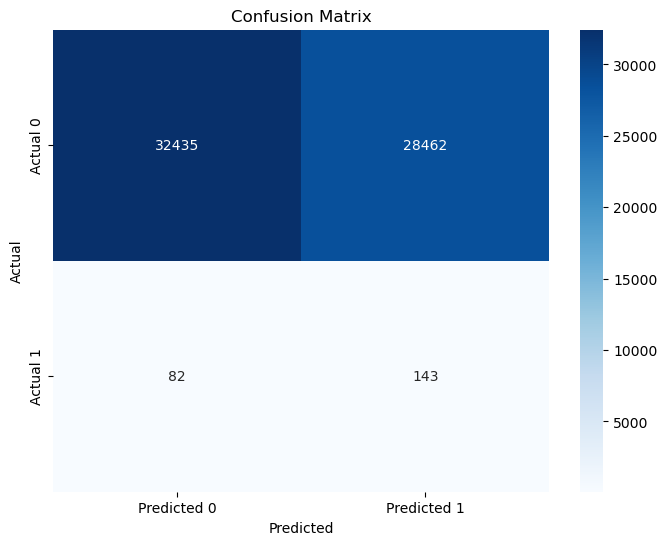

In [98]:
# Evaluate on the new test set
y_new_test_pred = pipeline.predict(X_new_test)
print(classification_report(y_new_test, y_new_test_pred))
print(f"ROC-AUC: {roc_auc_score(y_new_test, y_new_test_pred)}")

# Optional: Adjust the probability threshold for predictions
y_new_test_proba = pipeline.predict_proba(X_new_test)[:, 1]
threshold = 0.48 # Example threshold, adjust based on your needs
y_new_test_pred_adjusted = (y_new_test_proba >= threshold).astype(int)
print(classification_report(y_new_test, y_new_test_pred_adjusted))
print(f"ROC-AUC: {roc_auc_score(y_new_test, y_new_test_pred_adjusted)}")

# Confusion Matrix and Analysis
conf_matrix = confusion_matrix(y_new_test, y_new_test_pred_adjusted)
tn, fp, fn, tp = conf_matrix.ravel()
precision, recall, f1, _ = precision_recall_fscore_support(y_new_test, y_new_test_pred_adjusted, average='binary')

print(f"Confusion Matrix:\n{conf_matrix}")
print(f"True Negatives: {tn}")
print(f"False Positives: {fp}")
print(f"False Negatives: {fn}")
print(f"True Positives: {tp}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1-Score: {f1}")
print(f"SENSITIVITY: {conf_matrix[1,1]/sum(conf_matrix[1,:])}")
print(f"SPECIFICITY: {conf_matrix[0,0]/sum(conf_matrix[0,:])}")

# Plotting the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Predicted 0', 'Predicted 1'], yticklabels=['Actual 0', 'Actual 1'])
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title('Confusion Matrix')
plt.show()

#### SVM with mrmr

Selected features: ['214', '216', '213', '211', '215', '209', '217', '212', '219', '210', '204', '206', '203', '221', '205', '208', '207', '218', '201', '220', '234', '236', '233', '231', '235', '229', '237', '232', '199', '230', '224', '226', '223', '222', '225', '228', '227', '202', '239', '200', '174', '176', '173', '171', '175', '169', '177', '172', '179', '170']
              precision    recall  f1-score   support

         0.0       1.00      0.04      0.08     22642
         1.0       0.00      1.00      0.01        57

    accuracy                           0.04     22699
   macro avg       0.50      0.52      0.04     22699
weighted avg       1.00      0.04      0.08     22699

ROC-AUC: 0.5210670435473899
Selected features: ['214', '216', '213', '211', '215', '209', '217', '212', '219', '210', '204', '206', '203', '221', '205', '208', '207', '218', '201', '220', '234', '236', '233', '231', '235', '229', '237', '232', '199', '230', '224', '226', '223', '222', '225', '228', '22

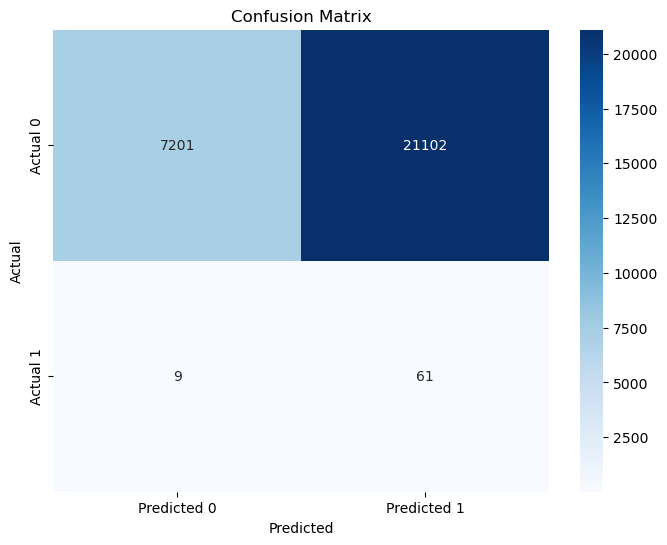

In [88]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, StratifiedKFold
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, roc_auc_score, confusion_matrix, precision_recall_fscore_support
from sklearn.base import BaseEstimator, TransformerMixin
from imblearn.under_sampling import RandomUnderSampler
from imblearn.pipeline import Pipeline
import seaborn as sns
import matplotlib.pyplot as plt
import pymrmr

# Custom transformer for MRMR feature selection
class MRMRFeatureSelector(BaseEstimator, TransformerMixin):
    def __init__(self, n_features_to_select=30):
        self.n_features_to_select = n_features_to_select
        self.selected_features = None
    
    def fit(self, X, y):
        # Ensure X is a DataFrame with string column names
        if not isinstance(X, pd.DataFrame):
            X = pd.DataFrame(X)
        X.columns = X.columns.astype(str)
        
        # Ensure y is a DataFrame with an appropriate name
        if not isinstance(y, pd.Series):
            y = pd.Series(y, name='target')
        else:
            y.name = 'target'
        
        # Concatenate X and y, and drop any NaN values
        df = pd.concat([X, y], axis=1).dropna()
        
        # Perform MRMR feature selection
        selected_features = pymrmr.mRMR(df, 'MIQ', self.n_features_to_select)
        self.selected_features = selected_features
        print(f"Selected features: {self.selected_features}")  # Debugging print
        return self
    
    def transform(self, X):
        # Convert X to DataFrame if it's not already
        if not isinstance(X, pd.DataFrame):
            X = pd.DataFrame(X)
        # Ensure X has the same column names as during fit
        X.columns = X.columns.astype(str)
        return X[self.selected_features]

# Load data
df = custom_features_all

# Separate features and target
X = df.drop(columns=['Class'])
y = df['Class']

# Class Weights
class_weights = {
    0: 1,
    1: 100
}

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)

# Define the SVM model with balanced class weights
model_svm = SVC(
    class_weight=class_weights,
    probability=True,
    random_state=42
)

# Create a pipeline with RandomUnderSampler, standard scaler, MRMR, and SVM classifier
pipeline_svm = Pipeline([
    ('under', RandomUnderSampler(random_state=42)),
    ('scaler', StandardScaler()),
    ('mrmr', MRMRFeatureSelector(n_features_to_select=50)),
    ('classifier', model_svm)
])

# Perform stratified k-fold cross-validation
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
for train_index, val_index in skf.split(X_train, y_train):
    X_train_fold, X_val_fold = X_train.iloc[train_index], X_train.iloc[val_index]
    y_train_fold, y_val_fold = y_train.iloc[train_index], y_train.iloc[val_index]

    pipeline_svm.fit(X_train_fold, y_train_fold)
    y_val_pred = pipeline_svm.predict(X_val_fold)
    print(classification_report(y_val_fold, y_val_pred))
    print(f"ROC-AUC: {roc_auc_score(y_val_fold, y_val_pred)}")

print("------------------------------")
# Train the final model on the full training set
pipeline_svm.fit(X_train, y_train)

# Evaluate on the test set
y_test_pred = pipeline_svm.predict(X_test)
print(classification_report(y_test, y_test_pred))
print(f"ROC-AUC: {roc_auc_score(y_test, y_test_pred)}")

# Optional: Adjust the probability threshold for predictions
y_test_proba = pipeline_svm.predict_proba(X_test)[:, 1]
threshold = 0.46  # Example threshold, adjust based on your needs
y_test_pred_adjusted = (y_test_proba >= threshold).astype(int)
print(classification_report(y_test, y_test_pred_adjusted))
print(f"ROC-AUC: {roc_auc_score(y_test, y_test_pred_adjusted)}")

# Confusion Matrix and Analysis
conf_matrix = confusion_matrix(y_test, y_test_pred_adjusted)
tn, fp, fn, tp = conf_matrix.ravel()
precision, recall, f1, _ = precision_recall_fscore_support(y_test, y_test_pred_adjusted, average='binary')

print(f"Confusion Matrix:\n{conf_matrix}")
print(f"True Negatives: {tn}")
print(f"False Positives: {fp}")
print(f"False Negatives: {fn}")
print(f"True Positives: {tp}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1-Score: {f1}")

# Plotting the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Predicted 0', 'Predicted 1'], yticklabels=['Actual 0', 'Actual 1'])
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title('Confusion Matrix')
plt.show()

#### Modify threshold for the model

              precision    recall  f1-score   support

         0.0       1.00      0.54      0.70     28303
         1.0       0.00      0.63      0.01        70

    accuracy                           0.54     28373
   macro avg       0.50      0.58      0.35     28373
weighted avg       1.00      0.54      0.70     28373

ROC-AUC: 0.5829144815542017
Confusion Matrix:
[[15206 13097]
 [   26    44]]
True Negatives: 15206
False Positives: 13097
False Negatives: 26
True Positives: 44
Precision: 0.0033482992161935924
Recall: 0.6285714285714286
F1-Score: 0.006661115736885929


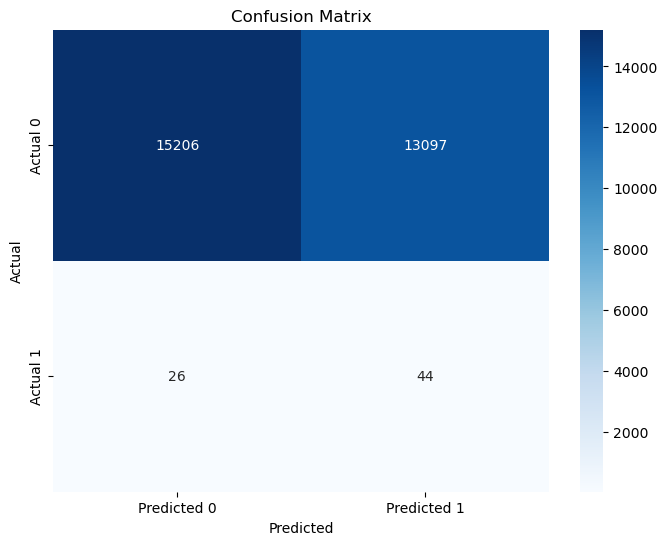

In [89]:
# Optional: Adjust the probability threshold for predictions
y_test_proba = pipeline_svm.predict_proba(X_test)[:, 1]
threshold = 0.54 # Example threshold, adjust based on your needs
y_test_pred_adjusted = (y_test_proba >= threshold).astype(int)
print(classification_report(y_test, y_test_pred_adjusted))
print(f"ROC-AUC: {roc_auc_score(y_test, y_test_pred_adjusted)}")

# Confusion Matrix and Analysis
conf_matrix = confusion_matrix(y_test, y_test_pred_adjusted)
tn, fp, fn, tp = conf_matrix.ravel()
precision, recall, f1, _ = precision_recall_fscore_support(y_test, y_test_pred_adjusted, average='binary')

print(f"Confusion Matrix:\n{conf_matrix}")
print(f"True Negatives: {tn}")
print(f"False Positives: {fp}")
print(f"False Negatives: {fn}")
print(f"True Positives: {tp}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1-Score: {f1}")

# Plotting the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Predicted 0', 'Predicted 1'], yticklabels=['Actual 0', 'Actual 1'])
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title('Confusion Matrix')
plt.show()

#### Try on subset8 testing

              precision    recall  f1-score   support

         0.0       1.00      0.07      0.13     60897
         1.0       0.00      0.98      0.01       225

    accuracy                           0.07     61122
   macro avg       0.50      0.52      0.07     61122
weighted avg       1.00      0.07      0.13     61122

ROC-AUC: 0.5235293473679601
              precision    recall  f1-score   support

         0.0       1.00      0.50      0.66     60897
         1.0       0.00      0.56      0.01       225

    accuracy                           0.50     61122
   macro avg       0.50      0.53      0.34     61122
weighted avg       0.99      0.50      0.66     61122

ROC-AUC: 0.5315037960271716
Confusion Matrix:
[[30361 30536]
 [   98   127]]
True Negatives: 30361
False Positives: 30536
False Negatives: 98
True Positives: 127
Precision: 0.004141799562991227
Recall: 0.5644444444444444
F1-Score: 0.008223258223258223
SENSITIVITY: 0.5644444444444444
SPECIFICITY: 0.49856314760989867


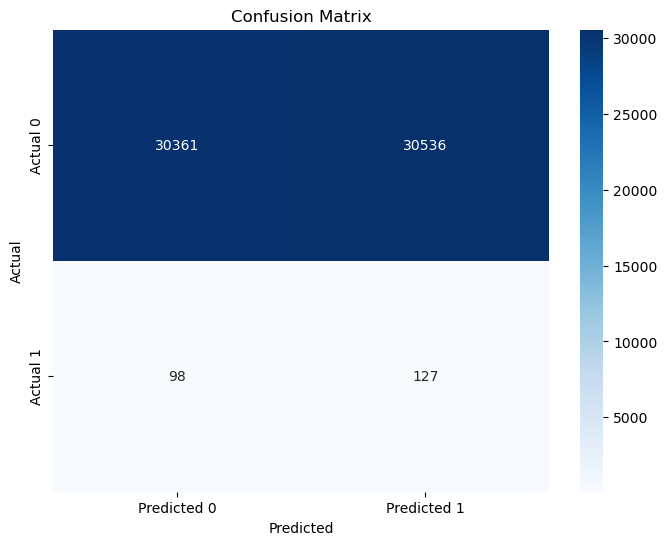

In [95]:
# Evaluate on the new test set
y_new_test_pred = pipeline_svm.predict(X_new_test)
print(classification_report(y_new_test, y_new_test_pred))
print(f"ROC-AUC: {roc_auc_score(y_new_test, y_new_test_pred)}")

# Optional: Adjust the probability threshold for predictions
y_new_test_proba = pipeline_svm.predict_proba(X_new_test)[:, 1]
threshold = 0.533 # Example threshold, adjust based on your needs
y_new_test_pred_adjusted = (y_new_test_proba >= threshold).astype(int)
print(classification_report(y_new_test, y_new_test_pred_adjusted))
print(f"ROC-AUC: {roc_auc_score(y_new_test, y_new_test_pred_adjusted)}")

# Confusion Matrix and Analysis
conf_matrix = confusion_matrix(y_new_test, y_new_test_pred_adjusted)
tn, fp, fn, tp = conf_matrix.ravel()
precision, recall, f1, _ = precision_recall_fscore_support(y_new_test, y_new_test_pred_adjusted, average='binary')

print(f"Confusion Matrix:\n{conf_matrix}")
print(f"True Negatives: {tn}")
print(f"False Positives: {fp}")
print(f"False Negatives: {fn}")
print(f"True Positives: {tp}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1-Score: {f1}")
print(f"SENSITIVITY: {conf_matrix[1,1]/sum(conf_matrix[1,:])}")
print(f"SPECIFICITY: {conf_matrix[0,0]/sum(conf_matrix[0,:])}")


# Plotting the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Predicted 0', 'Predicted 1'], yticklabels=['Actual 0', 'Actual 1'])
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title('Confusion Matrix')
plt.show()

### PCA

              precision    recall  f1-score   support

         0.0       1.00      0.13      0.23     22642
         1.0       0.00      0.98      0.01        57

    accuracy                           0.13     22699
   macro avg       0.50      0.56      0.12     22699
weighted avg       1.00      0.13      0.23     22699

ROC-AUC: 0.5569908119826994
              precision    recall  f1-score   support

         0.0       1.00      0.14      0.24     22642
         1.0       0.00      0.95      0.01        56

    accuracy                           0.14     22698
   macro avg       0.50      0.54      0.12     22698
weighted avg       1.00      0.14      0.24     22698

ROC-AUC: 0.5426427814302118
              precision    recall  f1-score   support

         0.0       1.00      0.15      0.26     22642
         1.0       0.00      0.98      0.01        56

    accuracy                           0.15     22698
   macro avg       0.50      0.57      0.13     22698
weighted avg      

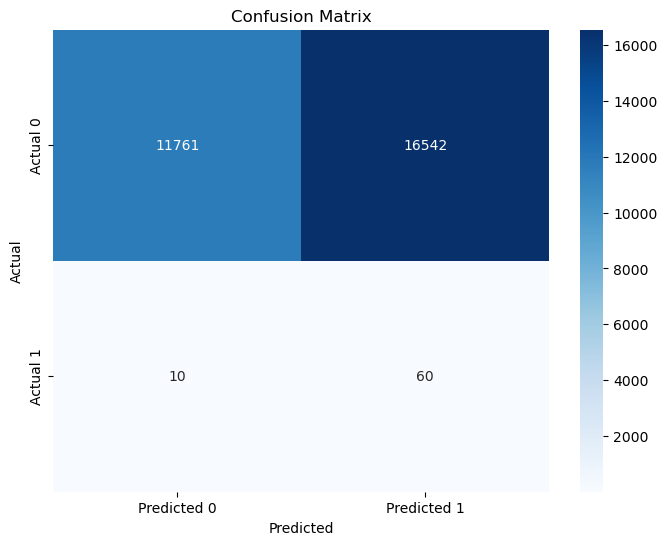

In [189]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, StratifiedKFold
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.metrics import classification_report, roc_auc_score, confusion_matrix, precision_recall_fscore_support
from sklearn.base import BaseEstimator, TransformerMixin
from imblearn.under_sampling import RandomUnderSampler
from imblearn.pipeline import Pipeline
import seaborn as sns
import matplotlib.pyplot as plt

# Load data
df = custom_features_all

# Separate features and target
X = df.drop(columns=['Class'])
y = df['Class']

# Class Weights
class_weights = {
    0: 1,
    1: 100
}

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)

# Define the SVM model with balanced class weights
model_svm = SVC(
    class_weight=class_weights,
    probability=True,
    random_state=42
)

# Create a pipeline with RandomUnderSampler, standard scaler, PCA, and SVM classifier
pipeline_svm = Pipeline([
    ('under', RandomUnderSampler(random_state=42)),
    ('scaler', StandardScaler()),
    ('pca', PCA(n_components=50)),  # Adjust n_components based on your needs
    ('classifier', model_svm)
])

# Perform stratified k-fold cross-validation
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
for train_index, val_index in skf.split(X_train, y_train):
    X_train_fold, X_val_fold = X_train.iloc[train_index], X_train.iloc[val_index]
    y_train_fold, y_val_fold = y_train.iloc[train_index], y_train.iloc[val_index]

    pipeline_svm.fit(X_train_fold, y_train_fold)
    y_val_pred = pipeline_svm.predict(X_val_fold)
    print(classification_report(y_val_fold, y_val_pred))
    print(f"ROC-AUC: {roc_auc_score(y_val_fold, y_val_pred)}")

print("------------------------------")
# Train the final model on the full training set
pipeline_svm.fit(X_train, y_train)

# Evaluate on the test set
y_test_pred = pipeline_svm.predict(X_test)
print(classification_report(y_test, y_test_pred))
print(f"ROC-AUC: {roc_auc_score(y_test, y_test_pred)}")

# Optional: Adjust the probability threshold for predictions
y_test_proba = pipeline_svm.predict_proba(X_test)[:, 1]
threshold = 0.46  # Example threshold, adjust based on your needs
y_test_pred_adjusted = (y_test_proba >= threshold).astype(int)
print(classification_report(y_test, y_test_pred_adjusted))
print(f"ROC-AUC: {roc_auc_score(y_test, y_test_pred_adjusted)}")

# Confusion Matrix and Analysis
conf_matrix = confusion_matrix(y_test, y_test_pred_adjusted)
tn, fp, fn, tp = conf_matrix.ravel()
precision, recall, f1, _ = precision_recall_fscore_support(y_test, y_test_pred_adjusted, average='binary')

print(f"Confusion Matrix:\n{conf_matrix}")
print(f"True Negatives: {tn}")
print(f"False Positives: {fp}")
print(f"False Negatives: {fn}")
print(f"True Positives: {tp}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1-Score: {f1}")
print(f"SENSITIVITY: {conf_matrix[1,1]/sum(conf_matrix[1,:])}")
print(f"SPECIFICITY: {conf_matrix[0,0]/sum(conf_matrix[0,:])}")

# Plotting the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Predicted 0', 'Predicted 1'], yticklabels=['Actual 0', 'Actual 1'])
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title('Confusion Matrix')
plt.show()

#### try diff thresholds

              precision    recall  f1-score   support

         0.0       1.00      0.14      0.25     28303
         1.0       0.00      0.97      0.01        70

    accuracy                           0.14     28373
   macro avg       0.50      0.56      0.13     28373
weighted avg       1.00      0.14      0.25     28373

ROC-AUC: 0.557084811806926
              precision    recall  f1-score   support

         0.0       1.00      0.50      0.67     28303
         1.0       0.00      0.77      0.01        70

    accuracy                           0.50     28373
   macro avg       0.50      0.64      0.34     28373
weighted avg       1.00      0.50      0.67     28373

ROC-AUC: 0.6374190519934788
Confusion Matrix:
[[14248 14055]
 [   16    54]]
True Negatives: 14248
False Positives: 14055
False Negatives: 16
True Positives: 54
Precision: 0.0038273442483521157
Recall: 0.7714285714285715
F1-Score: 0.00761689822977643
SENSITIVITY: 0.7714285714285715
SPECIFICITY: 0.503409532558386


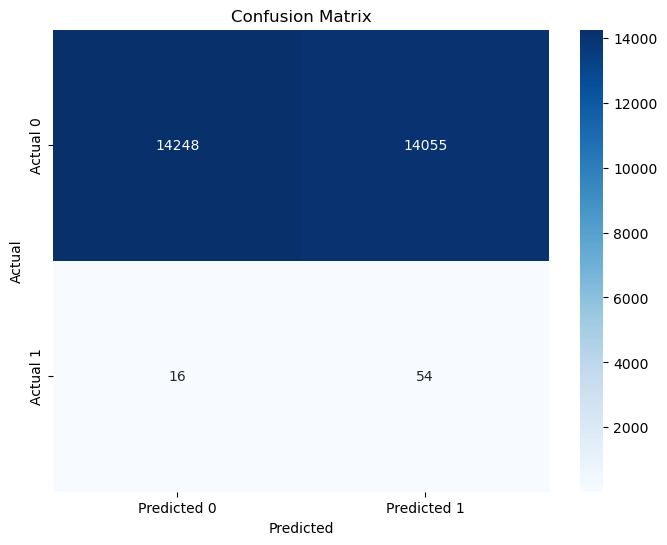

In [190]:
# Evaluate on the test set
y_test_pred = pipeline_svm.predict(X_test)
print(classification_report(y_test, y_test_pred))
print(f"ROC-AUC: {roc_auc_score(y_test, y_test_pred)}")

# Optional: Adjust the probability threshold for predictions
y_test_proba = pipeline_svm.predict_proba(X_test)[:, 1]
threshold = 0.5 # Example threshold, adjust based on your needs
y_test_pred_adjusted = (y_test_proba >= threshold).astype(int)
print(classification_report(y_test, y_test_pred_adjusted))
print(f"ROC-AUC: {roc_auc_score(y_test, y_test_pred_adjusted)}")

# Confusion Matrix and Analysis
conf_matrix = confusion_matrix(y_test, y_test_pred_adjusted)
tn, fp, fn, tp = conf_matrix.ravel()
precision, recall, f1, _ = precision_recall_fscore_support(y_test, y_test_pred_adjusted, average='binary')

print(f"Confusion Matrix:\n{conf_matrix}")
print(f"True Negatives: {tn}")
print(f"False Positives: {fp}")
print(f"False Negatives: {fn}")
print(f"True Positives: {tp}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1-Score: {f1}")
print(f"SENSITIVITY: {conf_matrix[1,1]/sum(conf_matrix[1,:])}")
print(f"SPECIFICITY: {conf_matrix[0,0]/sum(conf_matrix[0,:])}")

# Plotting the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Predicted 0', 'Predicted 1'], yticklabels=['Actual 0', 'Actual 1'])
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title('Confusion Matrix')
plt.show()

#### Try on subset8 testing

              precision    recall  f1-score   support

         0.0       1.00      0.15      0.26     60897
         1.0       0.00      0.96      0.01       225

    accuracy                           0.15     61122
   macro avg       0.50      0.55      0.13     61122
weighted avg       1.00      0.15      0.26     61122

ROC-AUC: 0.5518947293517469
              precision    recall  f1-score   support

         0.0       1.00      0.50      0.66     60897
         1.0       0.00      0.64      0.01       225

    accuracy                           0.50     61122
   macro avg       0.50      0.57      0.34     61122
weighted avg       0.99      0.50      0.66     61122

ROC-AUC: 0.5709126339009585
Confusion Matrix:
[[30289 30608]
 [   80   145]]
True Negatives: 30289
False Positives: 30608
False Negatives: 80
True Positives: 145
Precision: 0.0047149871557246445
Recall: 0.6444444444444445
F1-Score: 0.009361482342307444
SENSITIVITY: 0.6444444444444445
SPECIFICITY: 0.49738082335747247


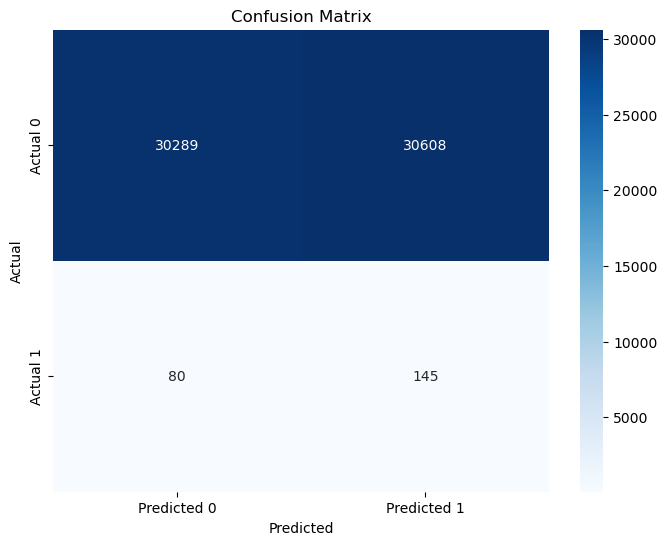

In [191]:
# Evaluate on the new test set
y_new_test_pred = pipeline_svm.predict(X_new_test)
print(classification_report(y_new_test, y_new_test_pred))
print(f"ROC-AUC: {roc_auc_score(y_new_test, y_new_test_pred)}")

# Optional: Adjust the probability threshold for predictions
y_new_test_proba = pipeline_svm.predict_proba(X_new_test)[:, 1]
threshold = 0.5 # Example threshold, adjust based on your needs
y_new_test_pred_adjusted = (y_new_test_proba >= threshold).astype(int)
print(classification_report(y_new_test, y_new_test_pred_adjusted))
print(f"ROC-AUC: {roc_auc_score(y_new_test, y_new_test_pred_adjusted)}")

# Confusion Matrix and Analysis
conf_matrix = confusion_matrix(y_new_test, y_new_test_pred_adjusted)
tn, fp, fn, tp = conf_matrix.ravel()
precision, recall, f1, _ = precision_recall_fscore_support(y_new_test, y_new_test_pred_adjusted, average='binary')

print(f"Confusion Matrix:\n{conf_matrix}")
print(f"True Negatives: {tn}")
print(f"False Positives: {fp}")
print(f"False Negatives: {fn}")
print(f"True Positives: {tp}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1-Score: {f1}")
print(f"SENSITIVITY: {conf_matrix[1,1]/sum(conf_matrix[1,:])}")
print(f"SPECIFICITY: {conf_matrix[0,0]/sum(conf_matrix[0,:])}")


# Plotting the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Predicted 0', 'Predicted 1'], yticklabels=['Actual 0', 'Actual 1'])
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title('Confusion Matrix')
plt.show()

#### ROC Curve

              precision    recall  f1-score   support

         0.0       1.00      0.15      0.26     60897
         1.0       0.00      0.96      0.01       225

    accuracy                           0.15     61122
   macro avg       0.50      0.55      0.13     61122
weighted avg       1.00      0.15      0.26     61122

ROC-AUC: 0.5518947293517469
              precision    recall  f1-score   support

         0.0       1.00      0.50      0.66     60897
         1.0       0.00      0.64      0.01       225

    accuracy                           0.50     61122
   macro avg       0.50      0.57      0.34     61122
weighted avg       0.99      0.50      0.66     61122

ROC-AUC: 0.5709126339009585
Confusion Matrix:
[[30289 30608]
 [   80   145]]
True Negatives: 30289
False Positives: 30608
False Negatives: 80
True Positives: 145
Precision: 0.0047149871557246445
Recall: 0.6444444444444445
F1-Score: 0.009361482342307444
SENSITIVITY: 0.6444444444444445
SPECIFICITY: 0.49738082335747247


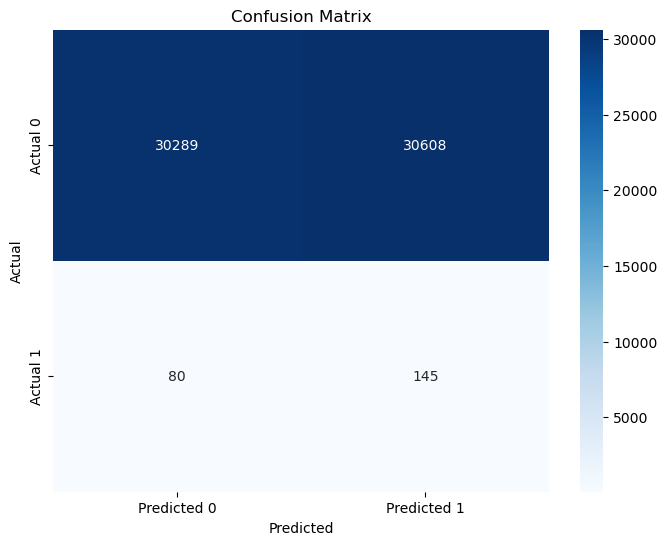

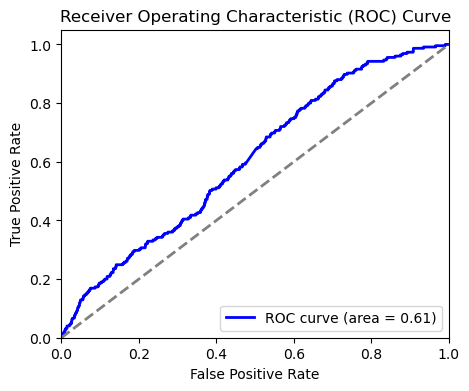

In [194]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming 'pipeline_lgbm_pca_gs' is the already trained model

# Separate features and target in the new test set
X_new_test = custom_features8.drop(columns=['Class'])
y_new_test = custom_features8['Class']

# Evaluate on the new test set
y_new_test_pred = pipeline_svm.predict(X_new_test)
print(classification_report(y_new_test, y_new_test_pred))
print(f"ROC-AUC: {roc_auc_score(y_new_test, y_new_test_pred)}")

# Adjust the probability threshold for predictions
y_new_test_proba = pipeline_svm.predict_proba(X_new_test)[:, 1]
threshold = 0.5  # Example threshold, adjust based on your needs
y_new_test_pred_adjusted = (y_new_test_proba >= threshold).astype(int)
print(classification_report(y_new_test, y_new_test_pred_adjusted))
print(f"ROC-AUC: {roc_auc_score(y_new_test, y_new_test_pred_adjusted)}")

# Confusion Matrix and Analysis
conf_matrix = confusion_matrix(y_new_test, y_new_test_pred_adjusted)
tn, fp, fn, tp = conf_matrix.ravel()
precision, recall, f1, _ = precision_recall_fscore_support(y_new_test, y_new_test_pred_adjusted, average='binary')

print(f"Confusion Matrix:\n{conf_matrix}")
print(f"True Negatives: {tn}")
print(f"False Positives: {fp}")
print(f"False Negatives: {fn}")
print(f"True Positives: {tp}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1-Score: {f1}")
print(f"SENSITIVITY: {conf_matrix[1,1]/sum(conf_matrix[1,:])}")
print(f"SPECIFICITY: {conf_matrix[0,0]/sum(conf_matrix[0,:])}")

# Plotting the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Predicted 0', 'Predicted 1'], yticklabels=['Actual 0', 'Actual 1'])
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title('Confusion Matrix')
plt.show()

# Plotting the ROC-AUC curve
fpr, tpr, _ = roc_curve(y_new_test, y_new_test_proba)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(5, 4))
plt.plot(fpr, tpr, color='blue', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='gray', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()


## LightGBM

In [19]:
%pip install lightgbm

  Obtaining dependency information for lightgbm from https://files.pythonhosted.org/packages/e1/4c/4685ccfae9806f561de716e32549190c1f533dde5bcadaf83bdf23972cf0/lightgbm-4.3.0-py3-none-win_amd64.whl.metadata
   ---------------------------------------- 0.0/1.3 MB ? eta -:--:--
   - -------------------------------------- 0.0/1.3 MB 1.9 MB/s eta 0:00:01
   ---------------------------------------  1.3/1.3 MB 21.0 MB/s eta 0:00:01
   ---------------------------------------- 1.3/1.3 MB 16.8 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


[LightGBM] [Info] Number of positive: 224, number of negative: 224
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000144 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 4190
[LightGBM] [Info] Number of data points in the train set: 448, number of used features: 30
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits wit

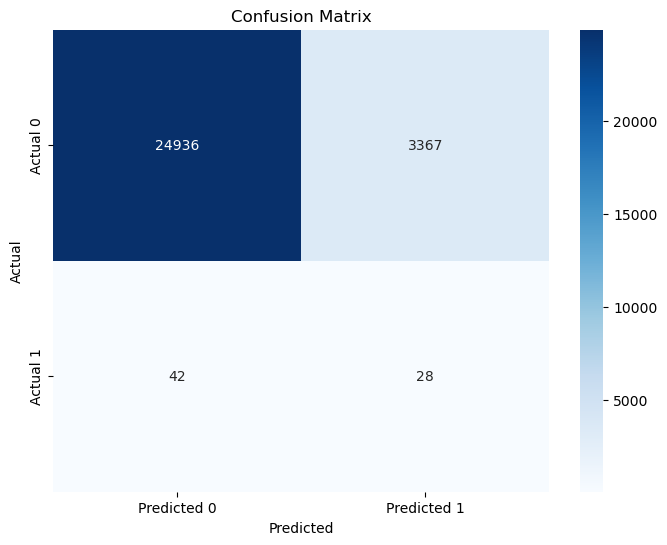

In [21]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, StratifiedKFold
from lightgbm import LGBMClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, roc_auc_score, confusion_matrix, precision_recall_fscore_support
from sklearn.feature_selection import RFE
from imblearn.under_sampling import RandomUnderSampler
from imblearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier
import seaborn as sns
import matplotlib.pyplot as plt

# Load data
df = custom_features_all

# Separate features and target
X = df.drop(columns=['Class'])
y = df['Class']

# Class Weights
class_weights = {
    0: 1,
    1: 100
}

# Calculate scale_pos_weight for LightGBM
scale_pos_weight = class_weights[0] / class_weights[1]

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)

# Define the LightGBM model with scale_pos_weight
model = LGBMClassifier(scale_pos_weight=scale_pos_weight, random_state=42)

# Perform RFE with RandomForestClassifier as the estimator
rfe = RFE(estimator=RandomForestClassifier(random_state=42), n_features_to_select=30, step=1)

# Create a pipeline with RandomUnderSampler, standard scaler, RFE, and LightGBM classifier
pipeline = Pipeline([
    ('under', RandomUnderSampler(random_state=42)),
    ('scaler', StandardScaler()),
    ('rfe', rfe),
    ('classifier', model)
])

# Perform stratified k-fold cross-validation
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
for train_index, val_index in skf.split(X_train, y_train):
    X_train_fold, X_val_fold = X_train.iloc[train_index], X_train.iloc[val_index]
    y_train_fold, y_val_fold = y_train.iloc[train_index], y_train.iloc[val_index]

    pipeline.fit(X_train_fold, y_train_fold)
    y_val_pred = pipeline.predict(X_val_fold)
    print(classification_report(y_val_fold, y_val_pred))
    print(f"ROC-AUC: {roc_auc_score(y_val_fold, y_val_pred)}")

print("------------------------------")
# Train the final model on the full training set
pipeline.fit(X_train, y_train)

# Evaluate on the test set
y_test_pred = pipeline.predict(X_test)
print(classification_report(y_test, y_test_pred))
print(f"ROC-AUC: {roc_auc_score(y_test, y_test_pred)}")

# Optional: Adjust the probability threshold for predictions
y_test_proba = pipeline.predict_proba(X_test)[:, 1]
threshold = 0.5  # Example threshold, adjust based on your needs 0.3 was good
y_test_pred_adjusted = (y_test_proba >= threshold).astype(int)
print(classification_report(y_test, y_test_pred_adjusted))
print(f"ROC-AUC: {roc_auc_score(y_test, y_test_pred_adjusted)}")

# Confusion Matrix and Analysis
conf_matrix = confusion_matrix(y_test, y_test_pred_adjusted)
tn, fp, fn, tp = conf_matrix.ravel()
precision, recall, f1, _ = precision_recall_fscore_support(y_test, y_test_pred_adjusted, average='binary')

print(f"Confusion Matrix:\n{conf_matrix}")
print(f"True Negatives: {tn}")
print(f"False Positives: {fp}")
print(f"False Negatives: {fn}")
print(f"True Positives: {tp}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1-Score: {f1}")

# Plotting the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Predicted 0', 'Predicted 1'], yticklabels=['Actual 0', 'Actual 1'])
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title('Confusion Matrix')
plt.show()


Selected features: ['214', '216', '213', '211', '215', '209', '217', '212', '219', '210', '204', '206', '203', '221', '205', '208', '207', '218', '201', '220', '234', '236', '233', '231', '235', '229', '237', '232', '199', '230', '224', '226', '223', '222', '225', '228', '227', '202', '239', '200', '174', '176', '173', '171', '175', '169', '177', '172', '179', '170']
[LightGBM] [Info] Number of positive: 224, number of negative: 224
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.002494 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 7484
[LightGBM] [Info] Number of data points in the train set: 448, number of used features: 50
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.997506 -> initscore=5.991465
[LightGBM] [Info] Start training from score 5.991465
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[Ligh

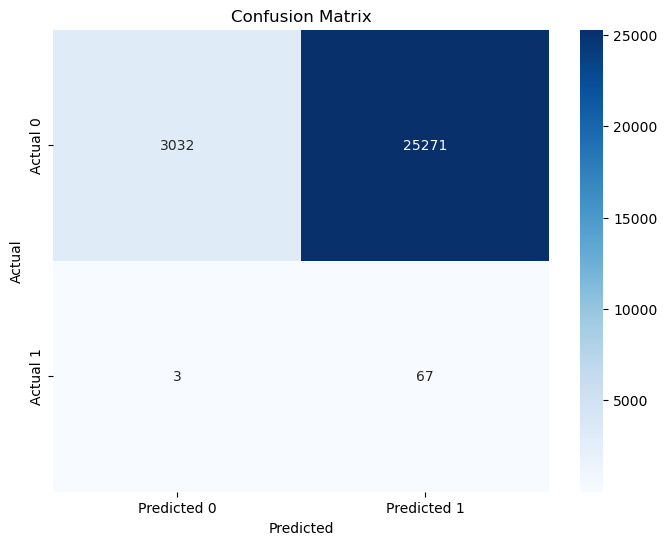

In [7]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, StratifiedKFold
from lightgbm import LGBMClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, roc_auc_score, confusion_matrix, precision_recall_fscore_support
from sklearn.base import BaseEstimator, TransformerMixin
from imblearn.under_sampling import RandomUnderSampler
from imblearn.pipeline import Pipeline
import seaborn as sns
import matplotlib.pyplot as plt
import pymrmr

# Custom transformer for MRMR feature selection
class MRMRFeatureSelector(BaseEstimator, TransformerMixin):
    def __init__(self, n_features_to_select=30):
        self.n_features_to_select = n_features_to_select
        self.selected_features = None
    
    def fit(self, X, y):
        # Ensure X is a DataFrame with string column names
        if not isinstance(X, pd.DataFrame):
            X = pd.DataFrame(X)
        X.columns = X.columns.astype(str)
        
        # Ensure y is a Series
        if not isinstance(y, pd.Series):
            y = pd.Series(y, name='target')
        
        # Concatenate X and y, and drop any NaN values
        df = pd.concat([X, y], axis=1).dropna()
        
        # Perform MRMR feature selection
        selected_features = pymrmr.mRMR(df, 'MIQ', self.n_features_to_select)
        self.selected_features = selected_features
        print(f"Selected features: {self.selected_features}")  # Debugging print
        return self
    
    def transform(self, X):
        # Convert X to DataFrame if it's not already
        if not isinstance(X, pd.DataFrame):
            X = pd.DataFrame(X)
        # Ensure X has the same column names as during fit
        X.columns = X.columns.astype(str)
        return X[self.selected_features]

# Load data
df = custom_features_all

# Separate features and target
X = df.drop(columns=['Class'])
y = df['Class']

# Class Weights
class_weights = {
    0: 1,
    1: 400
}

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)

# Define the LightGBM model with class weights
model_lgbm = LGBMClassifier(
    class_weight=class_weights,
    random_state=42,
    n_estimators=50,
    max_depth=-1,
    learning_rate=0.1,
    num_leaves=31
)

# Create a pipeline with RandomUnderSampler, standard scaler, MRMR, and LightGBM classifier
pipeline_lgbm = Pipeline([
    ('under', RandomUnderSampler(random_state=42)),
    ('scaler', StandardScaler()),
    ('mrmr', MRMRFeatureSelector(n_features_to_select=50)),
    ('classifier', model_lgbm)
])

# Perform stratified k-fold cross-validation
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
for train_index, val_index in skf.split(X_train, y_train):
    X_train_fold, X_val_fold = X_train.iloc[train_index], X_train.iloc[val_index]
    y_train_fold, y_val_fold = y_train.iloc[train_index], y_train.iloc[val_index]

    pipeline_lgbm.fit(X_train_fold, y_train_fold)
    y_val_pred = pipeline_lgbm.predict(X_val_fold)
    print(classification_report(y_val_fold, y_val_pred))
    print(f"ROC-AUC: {roc_auc_score(y_val_fold, y_val_pred)}")

print("------------------------------")
# Train the final model on the full training set
pipeline_lgbm.fit(X_train, y_train)

# Evaluate on the test set
y_test_pred = pipeline_lgbm.predict(X_test)
print(classification_report(y_test, y_test_pred))
print(f"ROC-AUC: {roc_auc_score(y_test, y_test_pred)}")

# Optional: Adjust the probability threshold for predictions
y_test_proba = pipeline_lgbm.predict_proba(X_test)[:, 1]
threshold = 0.41  # Example threshold, adjust based on your needs
y_test_pred_adjusted = (y_test_proba >= threshold).astype(int)
print(classification_report(y_test, y_test_pred_adjusted))
print(f"ROC-AUC: {roc_auc_score(y_test, y_test_pred_adjusted)}")

# Confusion Matrix and Analysis
conf_matrix = confusion_matrix(y_test, y_test_pred_adjusted)
tn, fp, fn, tp = conf_matrix.ravel()
precision, recall, f1, _ = precision_recall_fscore_support(y_test, y_test_pred_adjusted, average='binary')

print(f"Confusion Matrix:\n{conf_matrix}")
print(f"True Negatives: {tn}")
print(f"False Positives: {fp}")
print(f"False Negatives: {fn}")
print(f"True Positives: {tp}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1-Score: {f1}")

# Plotting the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Predicted 0', 'Predicted 1'], yticklabels=['Actual 0', 'Actual 1'])
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title('Confusion Matrix')
plt.show()


#### Try different trhesholds

              precision    recall  f1-score   support

         0.0       1.00      0.54      0.70     28303
         1.0       0.00      0.71      0.01        70

    accuracy                           0.54     28373
   macro avg       0.50      0.63      0.35     28373
weighted avg       1.00      0.54      0.70     28373

ROC-AUC: 0.6276265514508811
Confusion Matrix:
[[15311 12992]
 [   20    50]]
True Negatives: 15311
False Positives: 12992
False Negatives: 20
True Positives: 50
Precision: 0.003833767827020396
Recall: 0.7142857142857143
F1-Score: 0.00762660158633313


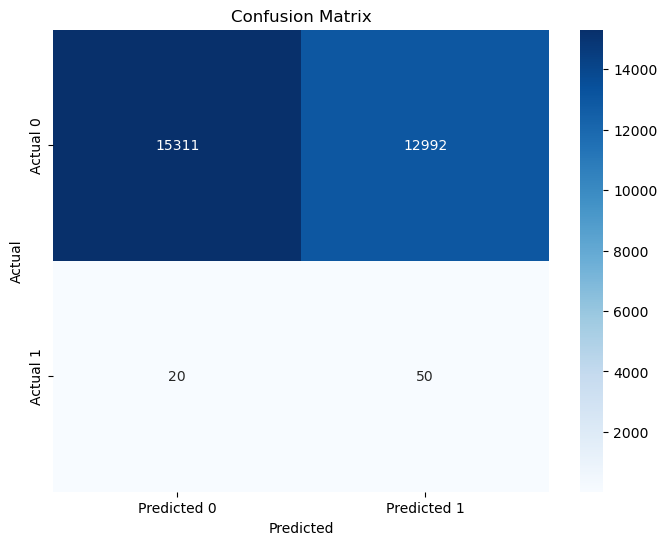

In [19]:
# Optional: Adjust the probability threshold for predictions
y_test_proba = pipeline_lgbm.predict_proba(X_test)[:, 1]
threshold = 0.9695  # Example threshold, adjust based on your needs
y_test_pred_adjusted = (y_test_proba >= threshold).astype(int)
print(classification_report(y_test, y_test_pred_adjusted))
print(f"ROC-AUC: {roc_auc_score(y_test, y_test_pred_adjusted)}")

# Confusion Matrix and Analysis
conf_matrix = confusion_matrix(y_test, y_test_pred_adjusted)
tn, fp, fn, tp = conf_matrix.ravel()
precision, recall, f1, _ = precision_recall_fscore_support(y_test, y_test_pred_adjusted, average='binary')

print(f"Confusion Matrix:\n{conf_matrix}")
print(f"True Negatives: {tn}")
print(f"False Positives: {fp}")
print(f"False Negatives: {fn}")
print(f"True Positives: {tp}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1-Score: {f1}")

# Plotting the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Predicted 0', 'Predicted 1'], yticklabels=['Actual 0', 'Actual 1'])
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title('Confusion Matrix')
plt.show()

#### On subset8 test

              precision    recall  f1-score   support

         0.0       1.00      0.12      0.21     60897
         1.0       0.00      0.94      0.01       225

    accuracy                           0.12     61122
   macro avg       0.50      0.53      0.11     61122
weighted avg       0.99      0.12      0.21     61122

ROC-AUC: 0.5311797516024326
              precision    recall  f1-score   support

         0.0       1.00      0.51      0.68     60897
         1.0       0.00      0.60      0.01       225

    accuracy                           0.51     61122
   macro avg       0.50      0.56      0.34     61122
weighted avg       0.99      0.51      0.67     61122

ROC-AUC: 0.5586305838820741
Confusion Matrix:
[[31229 29668]
 [   89   136]]
True Negatives: 31229
False Positives: 29668
False Negatives: 89
True Positives: 136
Precision: 0.0045631458864581935
Recall: 0.6044444444444445
F1-Score: 0.009057910686336542


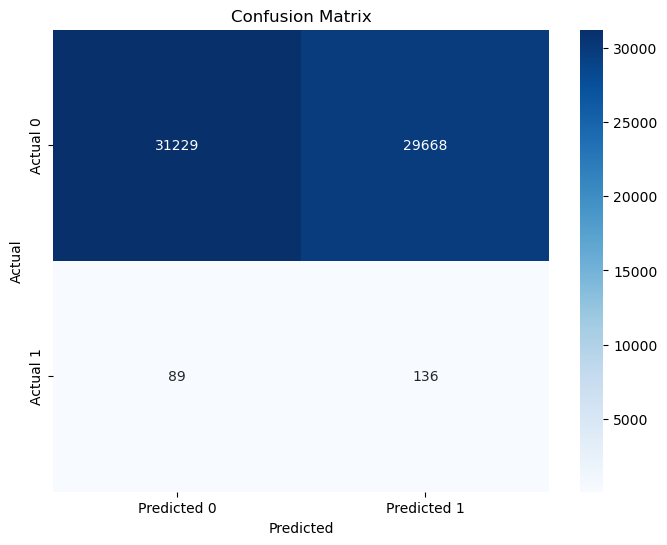

In [26]:
# Separate features and target in the new test set
X_new_test = custom_features8.drop(columns=['Class'])
y_new_test = custom_features8['Class']

# Evaluate on the new test set
y_new_test_pred = pipeline_lgbm.predict(X_new_test)
print(classification_report(y_new_test, y_new_test_pred))
print(f"ROC-AUC: {roc_auc_score(y_new_test, y_new_test_pred)}")

# Optional: Adjust the probability threshold for predictions
y_new_test_proba = pipeline_lgbm.predict_proba(X_new_test)[:, 1]
threshold = 0.96  # Example threshold, adjust based on your needs
y_new_test_pred_adjusted = (y_new_test_proba >= threshold).astype(int)
print(classification_report(y_new_test, y_new_test_pred_adjusted))
print(f"ROC-AUC: {roc_auc_score(y_new_test, y_new_test_pred_adjusted)}")

# Confusion Matrix and Analysis
conf_matrix = confusion_matrix(y_new_test, y_new_test_pred_adjusted)
tn, fp, fn, tp = conf_matrix.ravel()
precision, recall, f1, _ = precision_recall_fscore_support(y_new_test, y_new_test_pred_adjusted, average='binary')

print(f"Confusion Matrix:\n{conf_matrix}")
print(f"True Negatives: {tn}")
print(f"False Positives: {fp}")
print(f"False Negatives: {fn}")
print(f"True Positives: {tp}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1-Score: {f1}")

# Plotting the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Predicted 0', 'Predicted 1'], yticklabels=['Actual 0', 'Actual 1'])
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title('Confusion Matrix')
plt.show()

### Try with rfe

[LightGBM] [Info] Number of positive: 224, number of negative: 224
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000197 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 4190
[LightGBM] [Info] Number of data points in the train set: 448, number of used features: 30
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.997506 -> initscore=5.991465
[LightGBM] [Info] Start training from score 5.991465
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best 

e:\mp-anaconda3\envs\hm\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
e:\mp-anaconda3\envs\hm\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
e:\mp-anaconda3\envs\hm\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


[LightGBM] [Info] Number of positive: 225, number of negative: 225
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000346 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 4236
[LightGBM] [Info] Number of data points in the train set: 450, number of used features: 30
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.997506 -> initscore=5.991465
[LightGBM] [Info] Start training from score 5.991465
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best 

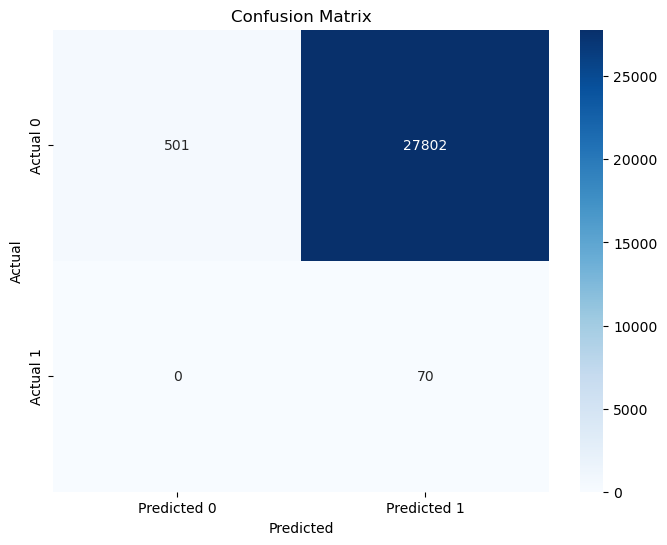

In [175]:
from sklearn.feature_selection import RFE
from sklearn.ensemble import RandomForestClassifier
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, StratifiedKFold
from lightgbm import LGBMClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, roc_auc_score, confusion_matrix, precision_recall_fscore_support
from sklearn.base import BaseEstimator, TransformerMixin
from imblearn.under_sampling import RandomUnderSampler
from imblearn.pipeline import Pipeline
import seaborn as sns
import matplotlib.pyplot as plt
import pymrmr


# Load data
df = custom_features_all

# Separate features and target
X = df.drop(columns=['Class'])
y = df['Class']

# Class Weights
class_weights = {
    0: 1,
    1: 400
}

# Perform RFE with RandomForestClassifier as the estimator
rfe = RFE(estimator=RandomForestClassifier(random_state=42), n_features_to_select=30, step=1)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)

# Define the LightGBM model with class weights
model_lgbm = LGBMClassifier(
    class_weight=class_weights,
    random_state=42,
    n_estimators=50,
    max_depth=-1,
    learning_rate=0.01,
    num_leaves=31
)

# Create a pipeline with RandomUnderSampler, standard scaler, MRMR, and LightGBM classifier
pipeline_lgbm = Pipeline([
    ('under', RandomUnderSampler(random_state=42)),
    ('scaler', StandardScaler()),
    ('rfe', rfe),
    ('classifier', model_lgbm)
])

# Perform stratified k-fold cross-validation
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
for train_index, val_index in skf.split(X_train, y_train):
    X_train_fold, X_val_fold = X_train.iloc[train_index], X_train.iloc[val_index]
    y_train_fold, y_val_fold = y_train.iloc[train_index], y_train.iloc[val_index]

    pipeline_lgbm.fit(X_train_fold, y_train_fold)
    y_val_pred = pipeline_lgbm.predict(X_val_fold)
    print(classification_report(y_val_fold, y_val_pred))
    print(f"ROC-AUC: {roc_auc_score(y_val_fold, y_val_pred)}")

print("------------------------------")
# Train the final model on the full training set
pipeline_lgbm.fit(X_train, y_train)

# Evaluate on the test set
y_test_pred = pipeline_lgbm.predict(X_test)
print(classification_report(y_test, y_test_pred))
print(f"ROC-AUC: {roc_auc_score(y_test, y_test_pred)}")

# Optional: Adjust the probability threshold for predictions
y_test_proba = pipeline_lgbm.predict_proba(X_test)[:, 1]
threshold = 0.41  # Example threshold, adjust based on your needs
y_test_pred_adjusted = (y_test_proba >= threshold).astype(int)
print(classification_report(y_test, y_test_pred_adjusted))
print(f"ROC-AUC: {roc_auc_score(y_test, y_test_pred_adjusted)}")

# Confusion Matrix and Analysis
conf_matrix = confusion_matrix(y_test, y_test_pred_adjusted)
tn, fp, fn, tp = conf_matrix.ravel()
precision, recall, f1, _ = precision_recall_fscore_support(y_test, y_test_pred_adjusted, average='binary')

print(f"Confusion Matrix:\n{conf_matrix}")
print(f"True Negatives: {tn}")
print(f"False Positives: {fp}")
print(f"False Negatives: {fn}")
print(f"True Positives: {tp}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1-Score: {f1}")
print(f"SENSITIVITY: {conf_matrix[1,1]/sum(conf_matrix[1,:])}")
print(f"SPECIFICITY: {conf_matrix[0,0]/sum(conf_matrix[0,:])}")

# Plotting the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Predicted 0', 'Predicted 1'], yticklabels=['Actual 0', 'Actual 1'])
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title('Confusion Matrix')
plt.show()

#### Try diff thresholds

              precision    recall  f1-score   support

         0.0       1.00      0.02      0.04     28303
         1.0       0.00      1.00      0.01        70

    accuracy                           0.02     28373
   macro avg       0.50      0.51      0.02     28373
weighted avg       1.00      0.02      0.04     28373

ROC-AUC: 0.5098222803236406
              precision    recall  f1-score   support

         0.0       1.00      0.51      0.67     28303
         1.0       0.00      0.73      0.01        70

    accuracy                           0.51     28373
   macro avg       0.50      0.62      0.34     28373
weighted avg       1.00      0.51      0.67     28373

ROC-AUC: 0.6189583638281656
Confusion Matrix:
[[14416 13887]
 [   19    51]]
True Negatives: 14416
False Positives: 13887
False Negatives: 19
True Positives: 51
Precision: 0.003659061558329746
Recall: 0.7285714285714285
F1-Score: 0.007281553398058253


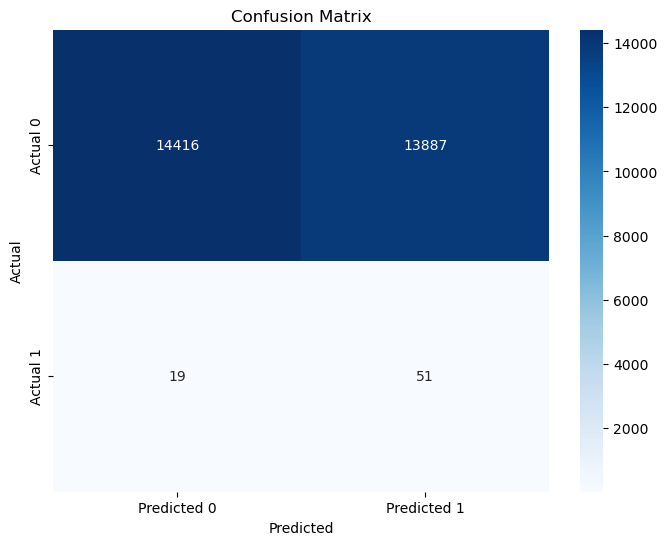

In [183]:
# Evaluate on the test set
y_test_pred = pipeline_lgbm.predict(X_test)
print(classification_report(y_test, y_test_pred))
print(f"ROC-AUC: {roc_auc_score(y_test, y_test_pred)}")

# Optional: Adjust the probability threshold for predictions
y_test_proba = pipeline_lgbm.predict_proba(X_test)[:, 1]
threshold = 0.994 # Example threshold, adjust based on your needs
y_test_pred_adjusted = (y_test_proba >= threshold).astype(int)
print(classification_report(y_test, y_test_pred_adjusted))
print(f"ROC-AUC: {roc_auc_score(y_test, y_test_pred_adjusted)}")

# Confusion Matrix and Analysis
conf_matrix = confusion_matrix(y_test, y_test_pred_adjusted)
tn, fp, fn, tp = conf_matrix.ravel()
precision, recall, f1, _ = precision_recall_fscore_support(y_test, y_test_pred_adjusted, average='binary')

print(f"Confusion Matrix:\n{conf_matrix}")
print(f"True Negatives: {tn}")
print(f"False Positives: {fp}")
print(f"False Negatives: {fn}")
print(f"True Positives: {tp}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1-Score: {f1}")

# Plotting the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Predicted 0', 'Predicted 1'], yticklabels=['Actual 0', 'Actual 1'])
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title('Confusion Matrix')
plt.show()

#### Try on subset8 testing

              precision    recall  f1-score   support

         0.0       1.00      0.02      0.04     60897
         1.0       0.00      1.00      0.01       225

    accuracy                           0.02     61122
   macro avg       0.50      0.51      0.02     61122
weighted avg       1.00      0.02      0.04     61122

ROC-AUC: 0.5103124948683844
              precision    recall  f1-score   support

         0.0       1.00      0.49      0.66     60897
         1.0       0.00      0.68      0.01       225

    accuracy                           0.50     61122
   macro avg       0.50      0.59      0.34     61122
weighted avg       0.99      0.50      0.66     61122

ROC-AUC: 0.5873602968947567
Confusion Matrix:
[[30127 30770]
 [   72   153]]
True Negatives: 30127
False Positives: 30770
False Negatives: 72
True Positives: 153
Precision: 0.004947773501924134
Recall: 0.68
F1-Score: 0.00982406575060999
SENSITIVITY: 0.68
SPECIFICITY: 0.49472059378951344


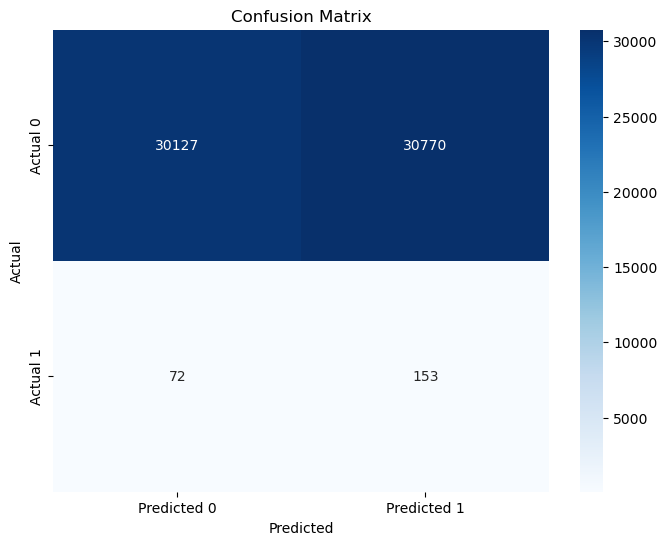

In [186]:
# Separate features and target in the new test set
X_new_test = custom_features8.drop(columns=['Class'])
y_new_test = custom_features8['Class']

# Evaluate on the new test set
y_new_test_pred = pipeline_lgbm.predict(X_new_test)
print(classification_report(y_new_test, y_new_test_pred))
print(f"ROC-AUC: {roc_auc_score(y_new_test, y_new_test_pred)}")

# Optional: Adjust the probability threshold for predictions
y_new_test_proba = pipeline_lgbm.predict_proba(X_new_test)[:, 1]
threshold = 0.9943  # Example threshold, adjust based on your needs
y_new_test_pred_adjusted = (y_new_test_proba >= threshold).astype(int)
print(classification_report(y_new_test, y_new_test_pred_adjusted))
print(f"ROC-AUC: {roc_auc_score(y_new_test, y_new_test_pred_adjusted)}")

# Confusion Matrix and Analysis
conf_matrix = confusion_matrix(y_new_test, y_new_test_pred_adjusted)
tn, fp, fn, tp = conf_matrix.ravel()
precision, recall, f1, _ = precision_recall_fscore_support(y_new_test, y_new_test_pred_adjusted, average='binary')

print(f"Confusion Matrix:\n{conf_matrix}")
print(f"True Negatives: {tn}")
print(f"False Positives: {fp}")
print(f"False Negatives: {fn}")
print(f"True Positives: {tp}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1-Score: {f1}")
print(f"SENSITIVITY: {conf_matrix[1,1]/sum(conf_matrix[1,:])}")
print(f"SPECIFICITY: {conf_matrix[0,0]/sum(conf_matrix[0,:])}")

# Plotting the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Predicted 0', 'Predicted 1'], yticklabels=['Actual 0', 'Actual 1'])
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title('Confusion Matrix')
plt.show()

#### ROC Curve

              precision    recall  f1-score   support

         0.0       1.00      0.02      0.04     60897
         1.0       0.00      1.00      0.01       225

    accuracy                           0.02     61122
   macro avg       0.50      0.51      0.02     61122
weighted avg       1.00      0.02      0.04     61122

ROC-AUC: 0.5103124948683844
              precision    recall  f1-score   support

         0.0       1.00      0.49      0.66     60897
         1.0       0.00      0.68      0.01       225

    accuracy                           0.50     61122
   macro avg       0.50      0.59      0.34     61122
weighted avg       0.99      0.50      0.66     61122

ROC-AUC: 0.5873602968947567
Confusion Matrix:
[[30127 30770]
 [   72   153]]
True Negatives: 30127
False Positives: 30770
False Negatives: 72
True Positives: 153
Precision: 0.004947773501924134
Recall: 0.68
F1-Score: 0.00982406575060999
SENSITIVITY: 0.68
SPECIFICITY: 0.49472059378951344


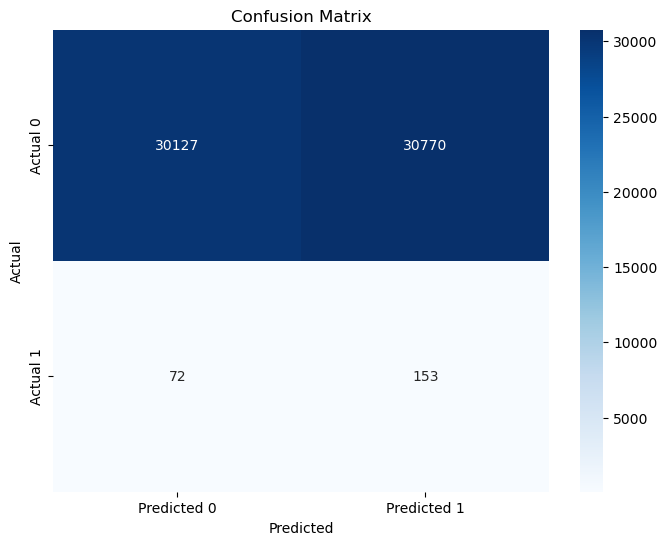

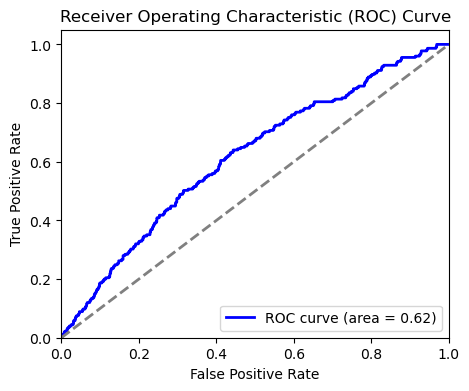

In [188]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming 'pipeline_lgbm_pca_gs' is the already trained model

# Separate features and target in the new test set
X_new_test = custom_features8.drop(columns=['Class'])
y_new_test = custom_features8['Class']

# Evaluate on the new test set
y_new_test_pred = pipeline_lgbm.predict(X_new_test)
print(classification_report(y_new_test, y_new_test_pred))
print(f"ROC-AUC: {roc_auc_score(y_new_test, y_new_test_pred)}")

# Adjust the probability threshold for predictions
y_new_test_proba = pipeline_lgbm.predict_proba(X_new_test)[:, 1]
threshold = 0.9943  # Example threshold, adjust based on your needs
y_new_test_pred_adjusted = (y_new_test_proba >= threshold).astype(int)
print(classification_report(y_new_test, y_new_test_pred_adjusted))
print(f"ROC-AUC: {roc_auc_score(y_new_test, y_new_test_pred_adjusted)}")

# Confusion Matrix and Analysis
conf_matrix = confusion_matrix(y_new_test, y_new_test_pred_adjusted)
tn, fp, fn, tp = conf_matrix.ravel()
precision, recall, f1, _ = precision_recall_fscore_support(y_new_test, y_new_test_pred_adjusted, average='binary')

print(f"Confusion Matrix:\n{conf_matrix}")
print(f"True Negatives: {tn}")
print(f"False Positives: {fp}")
print(f"False Negatives: {fn}")
print(f"True Positives: {tp}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1-Score: {f1}")
print(f"SENSITIVITY: {conf_matrix[1,1]/sum(conf_matrix[1,:])}")
print(f"SPECIFICITY: {conf_matrix[0,0]/sum(conf_matrix[0,:])}")

# Plotting the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Predicted 0', 'Predicted 1'], yticklabels=['Actual 0', 'Actual 1'])
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title('Confusion Matrix')
plt.show()

# Plotting the ROC-AUC curve
fpr, tpr, _ = roc_curve(y_new_test, y_new_test_proba)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(5, 4))
plt.plot(fpr, tpr, color='blue', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='gray', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()


### PCA

[LightGBM] [Info] Number of positive: 224, number of negative: 224
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000290 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 6737
[LightGBM] [Info] Number of data points in the train set: 448, number of used features: 45
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.990099 -> initscore=4.605170
[LightGBM] [Info] Start training from score 4.605170
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best 

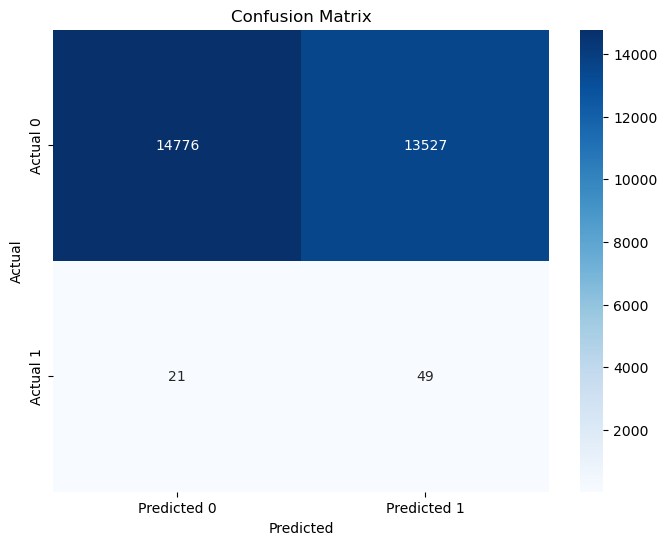

In [160]:
from sklearn.feature_selection import RFE
from sklearn.ensemble import RandomForestClassifier
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, StratifiedKFold
from lightgbm import LGBMClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.metrics import classification_report, roc_auc_score, confusion_matrix, precision_recall_fscore_support
from sklearn.base import BaseEstimator, TransformerMixin
from imblearn.under_sampling import RandomUnderSampler
from imblearn.pipeline import Pipeline
import seaborn as sns
import matplotlib.pyplot as plt

# Load data
df = custom_features_all

# Separate features and target
X = df.drop(columns=['Class'])
y = df['Class']

# Class Weights
class_weights = {
    0: 1,
    1: 100
}

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)

# Define the LightGBM model with class weights
model_lgbm = LGBMClassifier(
    class_weight=class_weights,
    random_state=42,
    n_estimators=50,
    max_depth=-1,
    learning_rate=0.1,
    num_leaves=31
)

# Create a pipeline with RandomUnderSampler, standard scaler, PCA, and LightGBM classifier
pipeline_lgbm_pca = Pipeline([
    ('under', RandomUnderSampler(random_state=42)),
    ('scaler', StandardScaler()),
    ('pca', PCA(n_components=45)),  # Adjust n_components based on your needs
    ('classifier', model_lgbm)
])

# Perform stratified k-fold cross-validation
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
for train_index, val_index in skf.split(X_train, y_train):
    X_train_fold, X_val_fold = X_train.iloc[train_index], X_train.iloc[val_index]
    y_train_fold, y_val_fold = y_train.iloc[train_index], y_train.iloc[val_index]

    pipeline_lgbm_pca.fit(X_train_fold, y_train_fold)
    y_val_pred = pipeline_lgbm_pca.predict(X_val_fold)
    print(classification_report(y_val_fold, y_val_pred))
    print(f"ROC-AUC: {roc_auc_score(y_val_fold, y_val_pred)}")

print("------------------------------")
# Train the final model on the full training set
pipeline_lgbm_pca.fit(X_train, y_train)

# Evaluate on the test set
y_test_pred = pipeline_lgbm_pca.predict(X_test)
print(classification_report(y_test, y_test_pred))
print(f"ROC-AUC: {roc_auc_score(y_test, y_test_pred)}")

# Optional: Adjust the probability threshold for predictions
y_test_proba = pipeline_lgbm_pca.predict_proba(X_test)[:, 1]
threshold = 0.88  # Example threshold, adjust based on your needs
y_test_pred_adjusted = (y_test_proba >= threshold).astype(int)
print(classification_report(y_test, y_test_pred_adjusted))
print(f"ROC-AUC: {roc_auc_score(y_test, y_test_pred_adjusted)}")

# Confusion Matrix and Analysis
conf_matrix = confusion_matrix(y_test, y_test_pred_adjusted)
tn, fp, fn, tp = conf_matrix.ravel()
precision, recall, f1, _ = precision_recall_fscore_support(y_test, y_test_pred_adjusted, average='binary')

print(f"Confusion Matrix:\n{conf_matrix}")
print(f"True Negatives: {tn}")
print(f"False Positives: {fp}")
print(f"False Negatives: {fn}")
print(f"True Positives: {tp}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1-Score: {f1}")
print(f"SENSITIVITY: {conf_matrix[1,1]/sum(conf_matrix[1,:])}")
print(f"SPECIFICITY: {conf_matrix[0,0]/sum(conf_matrix[0,:])}")

# Plotting the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Predicted 0', 'Predicted 1'], yticklabels=['Actual 0', 'Actual 1'])
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title('Confusion Matrix')
plt.show()


#### Try thresholds

              precision    recall  f1-score   support

         0.0       1.00      0.22      0.36     28303
         1.0       0.00      0.86      0.01        70

    accuracy                           0.22     28373
   macro avg       0.50      0.54      0.18     28373
weighted avg       1.00      0.22      0.36     28373

ROC-AUC: 0.5371994892010438
              precision    recall  f1-score   support

         0.0       1.00      0.50      0.67     28303
         1.0       0.00      0.71      0.01        70

    accuracy                           0.50     28373
   macro avg       0.50      0.61      0.34     28373
weighted avg       1.00      0.50      0.67     28373

ROC-AUC: 0.6092009428581524
Confusion Matrix:
[[14268 14035]
 [   20    50]]
True Negatives: 14268
False Positives: 14035
False Negatives: 20
True Positives: 50
Precision: 0.003549875754348598
Recall: 0.7142857142857143
F1-Score: 0.007064641469445425
SENSITIVITY: 0.7142857142857143
SPECIFICITY: 0.5041161714305904


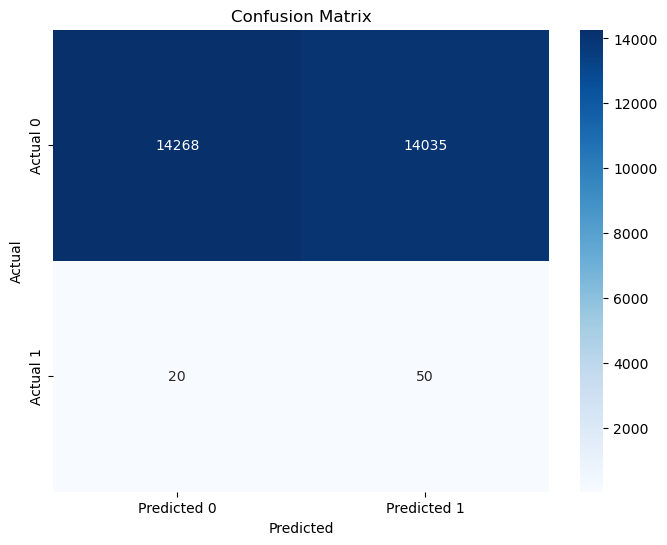

In [161]:
# Evaluate on the test set
y_test_pred = pipeline_lgbm_pca.predict(X_test)
print(classification_report(y_test, y_test_pred))
print(f"ROC-AUC: {roc_auc_score(y_test, y_test_pred)}")

# Optional: Adjust the probability threshold for predictions
y_test_proba = pipeline_lgbm_pca.predict_proba(X_test)[:, 1]
threshold = 0.87  # Example threshold, adjust based on your needs
y_test_pred_adjusted = (y_test_proba >= threshold).astype(int)
print(classification_report(y_test, y_test_pred_adjusted))
print(f"ROC-AUC: {roc_auc_score(y_test, y_test_pred_adjusted)}")

# Confusion Matrix and Analysis
conf_matrix = confusion_matrix(y_test, y_test_pred_adjusted)
tn, fp, fn, tp = conf_matrix.ravel()
precision, recall, f1, _ = precision_recall_fscore_support(y_test, y_test_pred_adjusted, average='binary')

print(f"Confusion Matrix:\n{conf_matrix}")
print(f"True Negatives: {tn}")
print(f"False Positives: {fp}")
print(f"False Negatives: {fn}")
print(f"True Positives: {tp}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1-Score: {f1}")
print(f"SENSITIVITY: {conf_matrix[1,1]/sum(conf_matrix[1,:])}")
print(f"SPECIFICITY: {conf_matrix[0,0]/sum(conf_matrix[0,:])}")

# Plotting the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Predicted 0', 'Predicted 1'], yticklabels=['Actual 0', 'Actual 1'])
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title('Confusion Matrix')
plt.show()

#### Subset8 testing

              precision    recall  f1-score   support

         0.0       1.00      0.21      0.35     60897
         1.0       0.00      0.83      0.01       225

    accuracy                           0.21     61122
   macro avg       0.50      0.52      0.18     61122
weighted avg       0.99      0.21      0.35     61122

ROC-AUC: 0.5203062000864849
              precision    recall  f1-score   support

         0.0       1.00      0.50      0.66     60897
         1.0       0.00      0.64      0.01       225

    accuracy                           0.50     61122
   macro avg       0.50      0.57      0.34     61122
weighted avg       0.99      0.50      0.66     61122

ROC-AUC: 0.5682306189139039
Confusion Matrix:
[[30233 30664]
 [   81   144]]
True Negatives: 30233
False Positives: 30664
False Negatives: 81
True Positives: 144
Precision: 0.004674110620618021
Recall: 0.64
F1-Score: 0.009280443398962395
SENSITIVITY: 0.64
SPECIFICITY: 0.4964612378278076


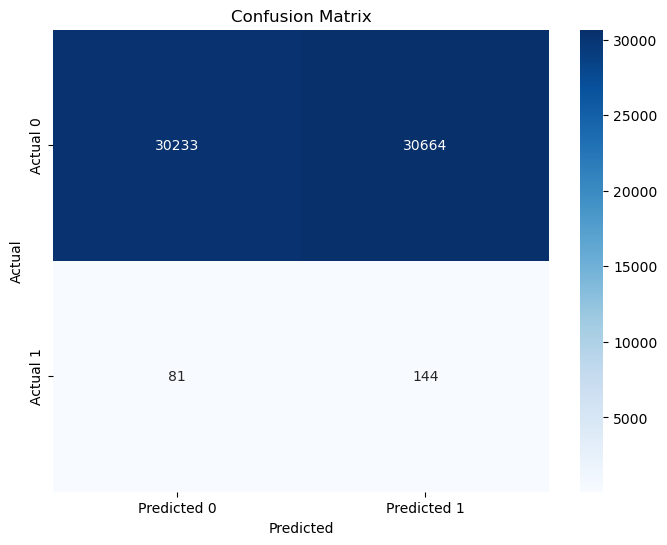

In [162]:
# Separate features and target in the new test set
X_new_test = custom_features8.drop(columns=['Class'])
y_new_test = custom_features8['Class']

# Evaluate on the new test set
y_new_test_pred = pipeline_lgbm_pca.predict(X_new_test)
print(classification_report(y_new_test, y_new_test_pred))
print(f"ROC-AUC: {roc_auc_score(y_new_test, y_new_test_pred)}")

# Optional: Adjust the probability threshold for predictions
y_new_test_proba = pipeline_lgbm_pca.predict_proba(X_new_test)[:, 1]
threshold = 0.87  # Example threshold, adjust based on your needs
y_new_test_pred_adjusted = (y_new_test_proba >= threshold).astype(int)
print(classification_report(y_new_test, y_new_test_pred_adjusted))
print(f"ROC-AUC: {roc_auc_score(y_new_test, y_new_test_pred_adjusted)}")

# Confusion Matrix and Analysis
conf_matrix = confusion_matrix(y_new_test, y_new_test_pred_adjusted)
tn, fp, fn, tp = conf_matrix.ravel()
precision, recall, f1, _ = precision_recall_fscore_support(y_new_test, y_new_test_pred_adjusted, average='binary')

print(f"Confusion Matrix:\n{conf_matrix}")
print(f"True Negatives: {tn}")
print(f"False Positives: {fp}")
print(f"False Negatives: {fn}")
print(f"True Positives: {tp}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1-Score: {f1}")
print(f"SENSITIVITY: {conf_matrix[1,1]/sum(conf_matrix[1,:])}")
print(f"SPECIFICITY: {conf_matrix[0,0]/sum(conf_matrix[0,:])}")

# Plotting the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Predicted 0', 'Predicted 1'], yticklabels=['Actual 0', 'Actual 1'])
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title('Confusion Matrix')
plt.show()

#### Gridsearch rfe lgbm

[LightGBM] [Info] Number of positive: 281, number of negative: 281
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000488 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 8441
[LightGBM] [Info] Number of data points in the train set: 562, number of used features: 45
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.990099 -> initscore=4.605170
[LightGBM] [Info] Start training from score 4.605170
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best 

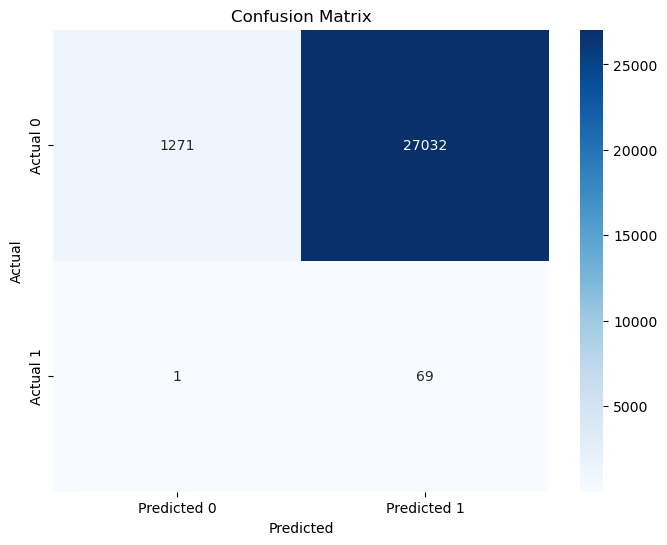

In [165]:
from sklearn.feature_selection import RFE
from sklearn.ensemble import RandomForestClassifier
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, StratifiedKFold, GridSearchCV
from lightgbm import LGBMClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.metrics import classification_report, roc_auc_score, confusion_matrix, precision_recall_fscore_support, make_scorer, recall_score
from imblearn.under_sampling import RandomUnderSampler
from imblearn.pipeline import Pipeline
import seaborn as sns
import matplotlib.pyplot as plt

# Load data
df = custom_features_all

# Separate features and target
X = df.drop(columns=['Class'])
y = df['Class']

# Class Weights
class_weights = {
    0: 1,
    1: 100
}

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)

# Define the LightGBM model with class weights
model_lgbm = LGBMClassifier(
    class_weight=class_weights,
    random_state=42
)

# Create a pipeline with RandomUnderSampler, standard scaler, PCA, and LightGBM classifier
pipeline_lgbm_pca_gs = Pipeline([
    ('under', RandomUnderSampler(random_state=42)),
    ('scaler', StandardScaler()),
    ('pca', PCA(n_components=45)),  # Adjust n_components based on your needs
    ('classifier', model_lgbm)
])

# Define the parameter grid for GridSearchCV
param_grid = {
    'classifier__n_estimators': [50, 100, 200],
    'classifier__max_depth': [-1, 10, 20],
    'classifier__learning_rate': [0.01, 0.1, 0.2],
    'classifier__num_leaves': [31, 50, 100]
}

# Define the scorer
scorer = make_scorer(recall_score, pos_label=1)

# Perform grid search with cross-validation
grid_search = GridSearchCV(pipeline_lgbm_pca_gs, param_grid, scoring=scorer, cv=5, n_jobs=-1)
grid_search.fit(X_train, y_train)

# Get the best parameters and score
best_params = grid_search.best_params_
best_score = grid_search.best_score_

print(f"Best parameters found: {best_params}")
print(f"Best recall score from grid search: {best_score}")

# Train the final model on the full training set with the best parameters
pipeline_lgbm_pca_gs.set_params(
    classifier__n_estimators=best_params['classifier__n_estimators'],
    classifier__max_depth=best_params['classifier__max_depth'],
    classifier__learning_rate=best_params['classifier__learning_rate'],
    classifier__num_leaves=best_params['classifier__num_leaves']
)
pipeline_lgbm_pca_gs.fit(X_train, y_train)

# Evaluate on the test set
y_test_pred = pipeline_lgbm_pca_gs.predict(X_test)
print(classification_report(y_test, y_test_pred))
print(f"ROC-AUC: {roc_auc_score(y_test, y_test_pred)}")

# Optional: Adjust the probability threshold for predictions
y_test_proba = pipeline_lgbm_pca_gs.predict_proba(X_test)[:, 1]
threshold = 0.88  # Example threshold, adjust based on your needs
y_test_pred_adjusted = (y_test_proba >= threshold).astype(int)
print(classification_report(y_test, y_test_pred_adjusted))
print(f"ROC-AUC: {roc_auc_score(y_test, y_test_pred_adjusted)}")

# Confusion Matrix and Analysis
conf_matrix = confusion_matrix(y_test, y_test_pred_adjusted)
tn, fp, fn, tp = conf_matrix.ravel()
precision, recall, f1, _ = precision_recall_fscore_support(y_test, y_test_pred_adjusted, average='binary')

print(f"Confusion Matrix:\n{conf_matrix}")
print(f"True Negatives: {tn}")
print(f"False Positives: {fp}")
print(f"False Negatives: {fn}")
print(f"True Positives: {tp}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1-Score: {f1}")
print(f"SENSITIVITY: {conf_matrix[1,1]/sum(conf_matrix[1,:])}")
print(f"SPECIFICITY: {conf_matrix[0,0]/sum(conf_matrix[0,:])}")

# Plotting the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Predicted 0', 'Predicted 1'], yticklabels=['Actual 0', 'Actual 1'])
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title('Confusion Matrix')
plt.show()

#### Try on diff thresholds

              precision    recall  f1-score   support

         0.0       1.00      0.00      0.00     28303
         1.0       0.00      1.00      0.00        70

    accuracy                           0.00     28373
   macro avg       0.50      0.50      0.00     28373
weighted avg       1.00      0.00      0.00     28373

ROC-AUC: 0.5003533194361022
              precision    recall  f1-score   support

         0.0       1.00      0.50      0.67     28303
         1.0       0.00      0.76      0.01        70

    accuracy                           0.50     28373
   macro avg       0.50      0.63      0.34     28373
weighted avg       1.00      0.50      0.67     28373

ROC-AUC: 0.6291809045987047
Confusion Matrix:
[[14186 14117]
 [   17    53]]
True Negatives: 14186
False Positives: 14117
False Negatives: 17
True Positives: 53
Precision: 0.0037402964008468598
Recall: 0.7571428571428571
F1-Score: 0.007443820224719101
SENSITIVITY: 0.7571428571428571
SPECIFICITY: 0.5012189520545525


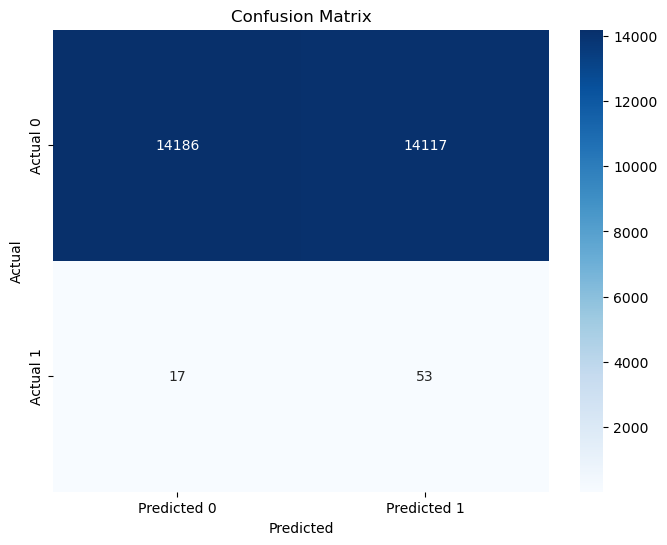

In [168]:
# Evaluate on the test set
y_test_pred = pipeline_lgbm_pca_gs.predict(X_test)
print(classification_report(y_test, y_test_pred))
print(f"ROC-AUC: {roc_auc_score(y_test, y_test_pred)}")

# Optional: Adjust the probability threshold for predictions
y_test_proba = pipeline_lgbm_pca_gs.predict_proba(X_test)[:, 1]
threshold = 0.98  # Example threshold, adjust based on your needs
y_test_pred_adjusted = (y_test_proba >= threshold).astype(int)
print(classification_report(y_test, y_test_pred_adjusted))
print(f"ROC-AUC: {roc_auc_score(y_test, y_test_pred_adjusted)}")

# Confusion Matrix and Analysis
conf_matrix = confusion_matrix(y_test, y_test_pred_adjusted)
tn, fp, fn, tp = conf_matrix.ravel()
precision, recall, f1, _ = precision_recall_fscore_support(y_test, y_test_pred_adjusted, average='binary')

print(f"Confusion Matrix:\n{conf_matrix}")
print(f"True Negatives: {tn}")
print(f"False Positives: {fp}")
print(f"False Negatives: {fn}")
print(f"True Positives: {tp}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1-Score: {f1}")
print(f"SENSITIVITY: {conf_matrix[1,1]/sum(conf_matrix[1,:])}")
print(f"SPECIFICITY: {conf_matrix[0,0]/sum(conf_matrix[0,:])}")

# Plotting the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Predicted 0', 'Predicted 1'], yticklabels=['Actual 0', 'Actual 1'])
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title('Confusion Matrix')
plt.show()

#### Try on subset8 testing

              precision    recall  f1-score   support

         0.0       1.00      0.21      0.35     60897
         1.0       0.00      0.83      0.01       225

    accuracy                           0.21     61122
   macro avg       0.50      0.52      0.18     61122
weighted avg       0.99      0.21      0.35     61122

ROC-AUC: 0.5203062000864849
              precision    recall  f1-score   support

         0.0       1.00      0.50      0.66     60897
         1.0       0.00      0.64      0.01       225

    accuracy                           0.50     61122
   macro avg       0.50      0.57      0.34     61122
weighted avg       0.99      0.50      0.66     61122

ROC-AUC: 0.5682306189139039
Confusion Matrix:
[[30233 30664]
 [   81   144]]
True Negatives: 30233
False Positives: 30664
False Negatives: 81
True Positives: 144
Precision: 0.004674110620618021
Recall: 0.64
F1-Score: 0.009280443398962395
SENSITIVITY: 0.64
SPECIFICITY: 0.4964612378278076


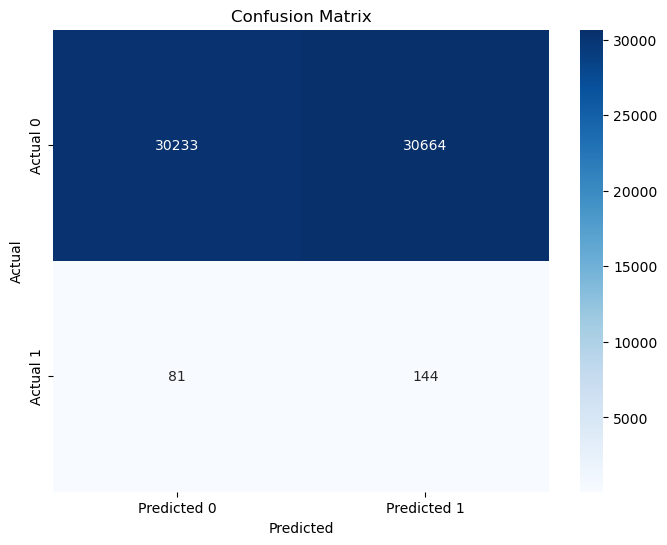

In [174]:
# Separate features and target in the new test set
X_new_test = custom_features8.drop(columns=['Class'])
y_new_test = custom_features8['Class']

# Evaluate on the new test set
y_new_test_pred = pipeline_lgbm_pca.predict(X_new_test)
print(classification_report(y_new_test, y_new_test_pred))
print(f"ROC-AUC: {roc_auc_score(y_new_test, y_new_test_pred)}")

# Optional: Adjust the probability threshold for predictions
y_new_test_proba = pipeline_lgbm_pca.predict_proba(X_new_test)[:, 1]
threshold = 0.87  # Example threshold, adjust based on your needs
y_new_test_pred_adjusted = (y_new_test_proba >= threshold).astype(int)
print(classification_report(y_new_test, y_new_test_pred_adjusted))
print(f"ROC-AUC: {roc_auc_score(y_new_test, y_new_test_pred_adjusted)}")

# Confusion Matrix and Analysis
conf_matrix = confusion_matrix(y_new_test, y_new_test_pred_adjusted)
tn, fp, fn, tp = conf_matrix.ravel()
precision, recall, f1, _ = precision_recall_fscore_support(y_new_test, y_new_test_pred_adjusted, average='binary')

print(f"Confusion Matrix:\n{conf_matrix}")
print(f"True Negatives: {tn}")
print(f"False Positives: {fp}")
print(f"False Negatives: {fn}")
print(f"True Positives: {tp}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1-Score: {f1}")
print(f"SENSITIVITY: {conf_matrix[1,1]/sum(conf_matrix[1,:])}")
print(f"SPECIFICITY: {conf_matrix[0,0]/sum(conf_matrix[0,:])}")

# Plotting the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Predicted 0', 'Predicted 1'], yticklabels=['Actual 0', 'Actual 1'])
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title('Confusion Matrix')
plt.show()